In [220]:
#importing required librariess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [221]:
#loading the dataset
data= pd.read_csv("housingdata.csv")

In [222]:
data.head()

Unnamed: 0      Suburb           Address  Rooms Type    Price Method  \
0           1  Abbotsford      85 Turner St      2    h  1480000      S   
1           2  Abbotsford   25 Bloomburg St      2    h  1035000      S   
2           4  Abbotsford      5 Charles St      3    h  1465000     SP   
3           5  Abbotsford  40 Federation La      3    h   850000     PI   
4           6  Abbotsford       55a Park St      4    h  1600000     VB   

  SellerG       Date  Distance  ...  Bathroom  Car  Landsize  BuildingArea  \
0  Biggin  3/12/2016       2.5  ...       1.0  1.0     202.0           NaN   
1  Biggin  4/02/2016       2.5  ...       1.0  0.0     156.0          79.0   
2  Biggin  4/03/2017       2.5  ...       2.0  0.0     134.0         150.0   
3  Biggin  4/03/2017       2.5  ...       2.0  1.0      94.0           NaN   
4  Nelson  4/06/2016       2.5  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea  Lattitude Longtitude             Regionname  \
0        NaN        Yarra   -37.7996   144.9984  Northern Metropolitan   
1     1900.0        Yarra   -37.8079   144.9934  Northern Metropolitan   
2     1900.0        Yarra   -37.8093   144.9944  Northern Metropolitan   
3        NaN        Yarra   -37.7969   144.9969  Northern Metropolitan   
4     2014.0        Yarra   -37.8072   144.9941  Northern Metropolitan   

   Propertycount  
0         4019.0  
1         4019.0  
2         4019.0  
3         4019.0  
4         4019.0  

[5 rows x 22 columns]

In [223]:
#analysing the dimensions of the dataset
data.shape

(18396, 22)

In [224]:
#Features in the dataset
data.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [225]:
data.dtypes

Unnamed: 0         int64
Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  int64  
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [227]:
data.tail()

Unnamed: 0        Suburb          Address  Rooms Type    Price Method  \
18391       23540  Williamstown  8/2 Thompson St      2    t   622500     SP   
18392       23541  Williamstown     96 Verdon St      4    h  2500000     PI   
18393       23544     Yallambie     17 Amaroo Wy      4    h  1100000      S   
18394       23545    Yarraville       6 Agnes St      4    h  1285000     SP   
18395       23546    Yarraville    33 Freeman St      4    h  1050000     VB   

          SellerG        Date  Distance  ...  Bathroom  Car  Landsize  \
18391        Greg  26/08/2017       6.8  ...       2.0  1.0       NaN   
18392     Sweeney  26/08/2017       6.8  ...       1.0  5.0     866.0   
18393  Buckingham  26/08/2017      12.7  ...       3.0  2.0       NaN   
18394     Village  26/08/2017       6.3  ...       1.0  1.0     362.0   
18395     Village  26/08/2017       6.3  ...       2.0  2.0       NaN   

       BuildingArea  YearBuilt  CouncilArea  Lattitude Longtitude  \
18391          89.0     2010.0          NaN  -37.86393  144.90484   
18392         157.0     1920.0          NaN  -37.85908  144.89299   
18393           NaN        NaN          NaN  -37.72006  145.10547   
18394         112.0     1920.0          NaN  -37.81188  144.88449   
18395         139.0     1950.0          NaN  -37.81829  144.87404   

                  Regionname  Propertycount  
18391   Western Metropolitan         6380.0  
18392   Western Metropolitan         6380.0  
18393  Northern Metropolitan         1369.0  
18394   Western Metropolitan         6543.0  
18395   Western Metropolitan         6543.0  

[5 rows x 22 columns]

# Data Cleaning and Preprocessing

# 1. checking for null values

In [228]:
data.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

In [229]:
#looking at total number of null values in the dataset
total_null_values= data.isnull().sum().sum()
total_null_values

48212

In [230]:
total_size= data.size
total_size

404712

In [231]:
#Calculating the percentage of missing values
proportion_null_values = (total_null_values / total_size) * 100
proportion_null_values

11.91266876198383

In [232]:
#for the postcoded we tried to  check with same address of the data and  assign
data[data['Postcode'].isnull()]

Unnamed: 0         Suburb           Address  Rooms Type   Price Method  \
14440       18523  Footscray Lot  2/16 Stafford St      2    u  710000      S   

      SellerG        Date  Distance  ...  Bathroom  Car  Landsize  \
14440     Jas  15/07/2017       NaN  ...       NaN  NaN       NaN   

       BuildingArea  YearBuilt  CouncilArea  Lattitude Longtitude  Regionname  \
14440           NaN        NaN          NaN        NaN        NaN         NaN   

       Propertycount  
14440            NaN  

[1 rows x 22 columns]

In [233]:
#But there is no postcode of that address so we are deleting the column
data[data['Suburb']=='Footscray Lot']['Postcode']
data[data['Address']=='2/16 Stafford St']['Postcode']

14440   NaN
Name: Postcode, dtype: float64

In [234]:
#dropping the rows with missing values for columns: Distance Postcode Regionname Propertycount
#dropping postcode,distance,regionname,propertycount does not affect the prediction as it is only one row.

In [235]:
data.dropna(subset=['Distance','Postcode','Regionname','Propertycount'], inplace=True)

In [236]:
data.shape

(18395, 22)

In [237]:
# Missing values in Bedroom2 column

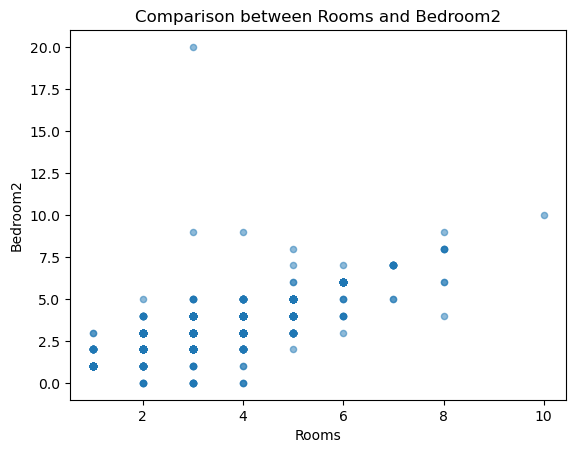

In [238]:
#Checking if the room and Bedroom2 values are similar
data[['Rooms', 'Bedroom2']].plot(kind='scatter', x='Rooms', y='Bedroom2', alpha=0.5)
plt.xlabel('Rooms')
plt.ylabel('Bedroom2')
plt.title('Comparison between Rooms and Bedroom2')
plt.show()


In [239]:
#Checking how many values are matching in Rooms and Bedroom2 columns
matching_values = data[data['Rooms'] == data['Bedroom2']]
len(matching_values)

14243

In [240]:
#Calculating the non matching values in Rooms and Bedroom2 columns
non_matching_values = data[data['Rooms'] != data['Bedroom2']]
len(non_matching_values)

4152

In [241]:
#Checking how many non null values of Bedroom2 do not match with the Rooms
non_null_values_nm = non_matching_values['Bedroom2'].notnull().sum()
non_null_values_nm

684

In [242]:
#Checking how many null values of Bedroom2 do not match with the Rooms
null_values_nm = non_matching_values['Bedroom2'].isnull().sum()
null_values_nm

3468

In [243]:
# If 'Rooms' and 'Bedroom2' are highly correlated, then we are taking the same number of rooms as bedroom
correlation_value = data['Rooms'].corr(data['Bedroom2'])
correlation_value

0.9487396463565336

In [244]:
#We can observe that the number of values that do not match Bedroom2 and Rooms without null values are only 684 and they are highly correlated, hence we can state that the two columns are almost equal.

In [245]:
#Filling Bedroom2 with corresponding Rooms value
data['Bedroom2'].fillna(data['Rooms'], inplace=True)

In [246]:
#Checking if Bathroom and Bedroom2 are correlated
correlation_bed_bath= data['Bedroom2'].corr(data['Bathroom'])
correlation_bed_bath

0.5899680459867489

In [247]:
#The correlation value is less

In [248]:
#Looking at the unique values in Bathroom Column
data['Bathroom'].unique()

array([ 1.,  2., nan,  3.,  4.,  0.,  7.,  5.,  6.,  8.])

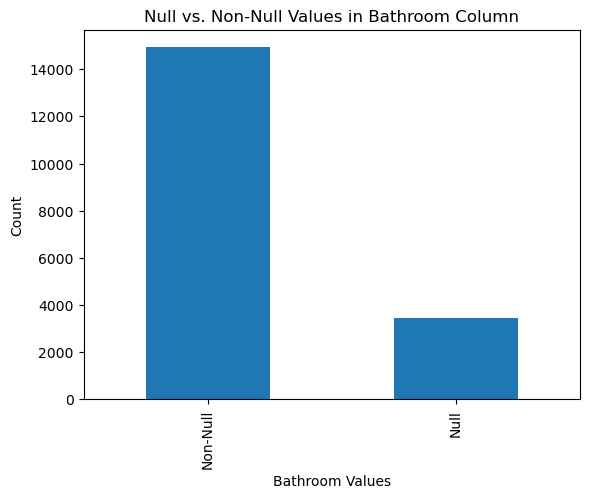

In [249]:
#Plotting a graph to analyze count of the Non-null and null values in Bathroom Column
data['Bathroom'].isnull().value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Non-Null', 'Null'])
plt.xlabel('Bathroom Values')
plt.ylabel('Count')
plt.title('Null vs. Non-Null Values in Bathroom Column')
plt.show()

In [250]:
data['Car'].unique()

array([ 1.,  0.,  2., nan,  6.,  5.,  4.,  3.,  8.,  7.,  9., 10.])

In [251]:
data['Car'].value_counts()

2.0     6183
1.0     6072
0.0     1057
3.0      809
4.0      549
5.0       66
6.0       60
8.0       12
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [252]:
#replacing the Bathroom and Car values with median:
cols_to_impute_with_median = ['Bathroom', 'Car']
for col in cols_to_impute_with_median:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

In [253]:
# Filling the Landsize, BuildingArea values using IterativeImputer
imputer = IterativeImputer()
columns_to_impute_advanced = ['Landsize', 'BuildingArea']
data[columns_to_impute_advanced] = imputer.fit_transform(data[columns_to_impute_advanced])

In [254]:
#Fixing null values in Year Built
median_year = data['YearBuilt'].median()
data['YearBuilt'].fillna(median_year, inplace=True)

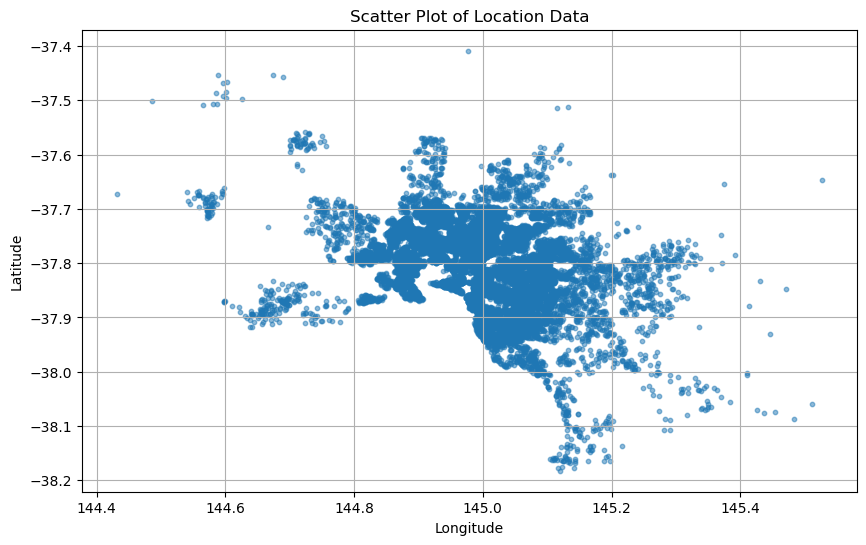

In [255]:
#Checking if the dataset has similar location data points
plt.figure(figsize=(10, 6))
plt.scatter(data['Longtitude'], data['Lattitude'], s=10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Location Data')
plt.grid(True)
plt.show()

In [256]:
#KNN imputation estimates missing values by considering the values of the nearest neighbors in the dataset. As the dataset contains similar location data points that are close to each other.
imputer = KNNImputer(n_neighbors=5)
data[['Lattitude', 'Longtitude']] = imputer.fit_transform(data[['Lattitude', 'Longtitude']])

In [257]:
data.isnull().sum()

Unnamed: 0          0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      6162
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [258]:
# This will group by 'Suburb' and then find the mode of CouncilArea for each suburb and assign
#For rows where CouncilArea is missing, we set the CouncilArea based on the Suburb of that row
def get_mode_or_default(x, default='Unknown'):
    if len(x.mode()) > 0:
        return x.mode().iloc[0]
    else:
        return default
suburb_to_council = data.groupby('Suburb')['CouncilArea'].apply(get_mode_or_default).to_dict()
data['CouncilArea'] = data.apply(
    lambda row: suburb_to_council[row['Suburb']] if pd.isnull(row['CouncilArea']) else row['CouncilArea'],
    axis=1
)

In [259]:
data.isnull().sum()

Unnamed: 0       0
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [260]:
data.shape

(18395, 22)

# 2. Removing Duplicates

In [261]:
#Dropping duplicates values in the dataset
data = data.drop_duplicates()
data.shape

(18395, 22)

In [262]:
#Checking the duplicate columns in the dataset
duplicates = data[data.duplicated()]
duplicates

Empty DataFrame
Columns: [Unnamed: 0, Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount]
Index: []

[0 rows x 22 columns]

In [263]:
data.duplicated().any()

False

In [264]:
#There are no duplicates in the dataset

# 3. Dropping Unwanted columns in the dataset

In [265]:
data.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [266]:
#Since Rooms and Bedroom2 are highly correlated data and have same data. We are dropping the column "Bedroom2"
data.drop(columns=['Bedroom2'], inplace=True)

In [267]:
data.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

# 4. Changing Data Type of Columns

In [268]:
data.dtypes

Unnamed: 0         int64
Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [269]:
# Changing Date datatype to datetime type
data['Date'] = pd.to_datetime(data['Date'])

/var/folders/kp/xfqjcgz93rx88km955rkxtjm0000gn/T/ipykernel_37497/1482365235.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [270]:
# Converting columns to int as Postcode, Bedroom2, YearBuilt and Property count are int values rather than float
columns_int = ['Postcode', 'Bathroom','Car','YearBuilt', 'Propertycount']
for col in columns_int:
    data[col] = data[col].astype(int)

In [271]:
#Converting price column datatype to float
data['Price'] = data['Price'].astype('float64')

In [272]:
# Converting the categorical columns to the 'category' data type
columns_obj = data.select_dtypes(["object"]).columns
data[columns_obj] = data[columns_obj].astype('category')

In [273]:
data.dtypes

Unnamed: 0                int64
Suburb                 category
Address                category
Rooms                     int64
Type                   category
Price                   float64
Method                 category
SellerG                category
Date             datetime64[ns]
Distance                float64
Postcode                  int64
Bathroom                  int64
Car                       int64
Landsize                float64
BuildingArea            float64
YearBuilt                 int64
CouncilArea            category
Lattitude               float64
Longtitude              float64
Regionname             category
Propertycount             int64
dtype: object

# 5. One-hot encoding on categorical columns

In [274]:
#Computing one-hot encoding for Type, Method and Regionname
ty=data['Type']
me=data['Method']
re=data['Regionname']
data = pd.get_dummies(data, columns=['Type', 'Method', 'Regionname'], drop_first=True)
data['Type']=ty
data['Method']=me
data['Regionname']=re

In [275]:
data.shape

(18395, 34)

In [276]:
data.dtypes

Unnamed: 0                                        int64
Suburb                                         category
Address                                        category
Rooms                                             int64
Price                                           float64
SellerG                                        category
Date                                     datetime64[ns]
Distance                                        float64
Postcode                                          int64
Bathroom                                          int64
Car                                               int64
Landsize                                        float64
BuildingArea                                    float64
YearBuilt                                         int64
CouncilArea                                    category
Lattitude                                       float64
Longtitude                                      float64
Propertycount                                   

# 6. Datetime Column: Extracting features

In [277]:
#Splitting the Date column to Year, Month, and Day
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
print(data.shape)

(18395, 37)


# 7. Adding feature Price per Square Meter to the dataset

In [278]:
#Computing the price per square meter 
#Making sure that the Landsize does not contain value 0, as it is a denominator value to compute Price_per_sqm
data['Landsize'] = data['Landsize'].replace(0, 1)
data['Price_per_sqm'] = data['Price'] / data['Landsize']
data.head()

Unnamed: 0      Suburb           Address  Rooms      Price SellerG  \
0           1  Abbotsford      85 Turner St      2  1480000.0  Biggin   
1           2  Abbotsford   25 Bloomburg St      2  1035000.0  Biggin   
2           4  Abbotsford      5 Charles St      3  1465000.0  Biggin   
3           5  Abbotsford  40 Federation La      3   850000.0  Biggin   
4           6  Abbotsford       55a Park St      4  1600000.0  Nelson   

        Date  Distance  Postcode  Bathroom  ...  \
0 2016-03-12       2.5      3067         1  ...   
1 2016-04-02       2.5      3067         1  ...   
2 2017-04-03       2.5      3067         2  ...   
3 2017-04-03       2.5      3067         2  ...   
4 2016-04-06       2.5      3067         1  ...   

   Regionname_Southern Metropolitan  Regionname_Western Metropolitan  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   Regionname_Western Victoria  Type Method             Regionname  Year  \
0                            0     h      S  Northern Metropolitan  2016   
1                            0     h      S  Northern Metropolitan  2016   
2                            0     h     SP  Northern Metropolitan  2017   
3                            0     h     PI  Northern Metropolitan  2017   
4                            0     h     VB  Northern Metropolitan  2016   

   Month  Day  Price_per_sqm  
0      3   12    7326.732673  
1      4    2    6634.615385  
2      4    3   10932.835821  
3      4    3    9042.553191  
4      4    6   13333.333333  

[5 rows x 38 columns]

# 8. Adding feature to know the Age of the building

In [279]:
#getting the value of current year
current_year = pd.Timestamp.now().year
#Calculating the age
data['BuildingAge'] = current_year - data['YearBuilt']
data.head()

Unnamed: 0      Suburb           Address  Rooms      Price SellerG  \
0           1  Abbotsford      85 Turner St      2  1480000.0  Biggin   
1           2  Abbotsford   25 Bloomburg St      2  1035000.0  Biggin   
2           4  Abbotsford      5 Charles St      3  1465000.0  Biggin   
3           5  Abbotsford  40 Federation La      3   850000.0  Biggin   
4           6  Abbotsford       55a Park St      4  1600000.0  Nelson   

        Date  Distance  Postcode  Bathroom  ...  \
0 2016-03-12       2.5      3067         1  ...   
1 2016-04-02       2.5      3067         1  ...   
2 2017-04-03       2.5      3067         2  ...   
3 2017-04-03       2.5      3067         2  ...   
4 2016-04-06       2.5      3067         1  ...   

   Regionname_Western Metropolitan  Regionname_Western Victoria  Type  Method  \
0                                0                            0     h       S   
1                                0                            0     h       S   
2                                0                            0     h      SP   
3                                0                            0     h      PI   
4                                0                            0     h      VB   

              Regionname  Year  Month  Day  Price_per_sqm  BuildingAge  
0  Northern Metropolitan  2016      3   12    7326.732673           53  
1  Northern Metropolitan  2016      4    2    6634.615385          123  
2  Northern Metropolitan  2017      4    3   10932.835821          123  
3  Northern Metropolitan  2017      4    3    9042.553191           53  
4  Northern Metropolitan  2016      4    6   13333.333333            9  

[5 rows x 39 columns]

# 9. Removing Miscellaneous Values

In [280]:
data.describe()

Unnamed: 0         Rooms         Price      Distance      Postcode  \
count  18395.000000  18395.000000  1.839500e+04  18395.000000  18395.000000   
mean   11826.423050      2.935091  1.056716e+06     10.389986   3107.140147   
std     6800.716076      0.958203  6.419340e+05      6.009050     95.000995   
min        1.000000      1.000000  8.500000e+04      0.000000   3000.000000   
25%     5936.500000      2.000000  6.330000e+05      6.300000   3046.000000   
50%    11820.000000      3.000000  8.800000e+05      9.700000   3085.000000   
75%    17733.000000      3.000000  1.302000e+06     13.300000   3149.000000   
max    23546.000000     12.000000  9.000000e+06     48.100000   3978.000000   

           Bathroom           Car       Landsize   BuildingArea     YearBuilt  \
count  18395.000000  18395.000000   18395.000000   18395.000000  18395.000000   
mean       1.436912      1.690242     554.209729     168.297551   1967.993640   
std        0.655666      0.871392    3429.354803     938.154921     25.910549   
min        0.000000      0.000000     -30.525235       0.000000   1196.000000   
25%        1.000000      1.000000     243.000000     100.000000   1970.000000   
50%        1.000000      2.000000     554.104157     165.410361   1970.000000   
75%        2.000000      2.000000     601.000000     173.000000   1970.000000   
max        8.000000     10.000000  433014.000000  112612.125506   2018.000000   

       ...  Regionname_Northern Victoria  \
count  ...                  18395.000000   
mean   ...                      0.003425   
std    ...                      0.058423   
min    ...                      0.000000   
25%    ...                      0.000000   
50%    ...                      0.000000   
75%    ...                      0.000000   
max    ...                      1.000000   

       Regionname_South-Eastern Metropolitan  \
count                           18395.000000   
mean                                0.036967   
std                                 0.188685   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Regionname_Southern Metropolitan  Regionname_Western Metropolitan  \
count                      18395.000000                     18395.000000   
mean                           0.344822                         0.211307   
std                            0.475323                         0.408247   
min                            0.000000                         0.000000   
25%                            0.000000                         0.000000   
50%                            0.000000                         0.000000   
75%                            1.000000                         0.000000   
max                            1.000000                         1.000000   

       Regionname_Western Victoria          Year         Month           Day  \
count                 18395.000000  18395.000000  18395.000000  18395.000000   
mean                      0.002283   2016.562164      6.741343     16.474803   
std                       0.047730      0.496134      2.738060      7.958961   
min                       0.000000   2016.000000      1.000000      2.000000   
25%                       0.000000   2016.000000      5.000000      9.000000   
50%                       0.000000   2017.000000      7.000000     16.000000   
75%                       0.000000   2017.000000      9.000000     24.000000   
max                       1.000000   2017.000000     12.000000     30.000000   

       Price_per_sqm   BuildingAge  
count   1.839500e+04  18395.000000  
mean    7.066126e+04     55.006360  
std     2.288355e+05     25.910549  
min    -7.968523e+04      5.000000  
25%     1.345577e+03     53.000000  
50%     2.290076e+03     53.000000  
75%     4.336082e+03     53.000000  
max     3.900000e+06    827.000000 

In [281]:
# From the above table, the minimum YearBuilt is 1196 which shows ambiguity
#Checking invalid years that are less than year value 1800
invalid_years = data[data['YearBuilt'] < 1800]
print(invalid_years.YearBuilt)

12754    1196
Name: YearBuilt, dtype: int64


In [282]:
#computing mode for the column
mode_year = data['YearBuilt'].mode().values[0]
#replacing the value with mode
data.loc[data['YearBuilt'] == 1196, 'YearBuilt'] = mode_year
mode_year

1970

In [283]:
data.describe()

Unnamed: 0         Rooms         Price      Distance      Postcode  \
count  18395.000000  18395.000000  1.839500e+04  18395.000000  18395.000000   
mean   11826.423050      2.935091  1.056716e+06     10.389986   3107.140147   
std     6800.716076      0.958203  6.419340e+05      6.009050     95.000995   
min        1.000000      1.000000  8.500000e+04      0.000000   3000.000000   
25%     5936.500000      2.000000  6.330000e+05      6.300000   3046.000000   
50%    11820.000000      3.000000  8.800000e+05      9.700000   3085.000000   
75%    17733.000000      3.000000  1.302000e+06     13.300000   3149.000000   
max    23546.000000     12.000000  9.000000e+06     48.100000   3978.000000   

           Bathroom           Car       Landsize   BuildingArea     YearBuilt  \
count  18395.000000  18395.000000   18395.000000   18395.000000  18395.000000   
mean       1.436912      1.690242     554.209729     168.297551   1968.035716   
std        0.655666      0.871392    3429.354803     938.154921     25.277550   
min        0.000000      0.000000     -30.525235       0.000000   1830.000000   
25%        1.000000      1.000000     243.000000     100.000000   1970.000000   
50%        1.000000      2.000000     554.104157     165.410361   1970.000000   
75%        2.000000      2.000000     601.000000     173.000000   1970.000000   
max        8.000000     10.000000  433014.000000  112612.125506   2018.000000   

       ...  Regionname_Northern Victoria  \
count  ...                  18395.000000   
mean   ...                      0.003425   
std    ...                      0.058423   
min    ...                      0.000000   
25%    ...                      0.000000   
50%    ...                      0.000000   
75%    ...                      0.000000   
max    ...                      1.000000   

       Regionname_South-Eastern Metropolitan  \
count                           18395.000000   
mean                                0.036967   
std                                 0.188685   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Regionname_Southern Metropolitan  Regionname_Western Metropolitan  \
count                      18395.000000                     18395.000000   
mean                           0.344822                         0.211307   
std                            0.475323                         0.408247   
min                            0.000000                         0.000000   
25%                            0.000000                         0.000000   
50%                            0.000000                         0.000000   
75%                            1.000000                         0.000000   
max                            1.000000                         1.000000   

       Regionname_Western Victoria          Year         Month           Day  \
count                 18395.000000  18395.000000  18395.000000  18395.000000   
mean                      0.002283   2016.562164      6.741343     16.474803   
std                       0.047730      0.496134      2.738060      7.958961   
min                       0.000000   2016.000000      1.000000      2.000000   
25%                       0.000000   2016.000000      5.000000      9.000000   
50%                       0.000000   2017.000000      7.000000     16.000000   
75%                       0.000000   2017.000000      9.000000     24.000000   
max                       1.000000   2017.000000     12.000000     30.000000   

       Price_per_sqm   BuildingAge  
count   1.839500e+04  18395.000000  
mean    7.066126e+04     55.006360  
std     2.288355e+05     25.910549  
min    -7.968523e+04      5.000000  
25%     1.345577e+03     53.000000  
50%     2.290076e+03     53.000000  
75%     4.336082e+03     53.000000  
max     3.900000e+06    827.000000 

# 10. Removing noisy data in Rooms and Bathroom

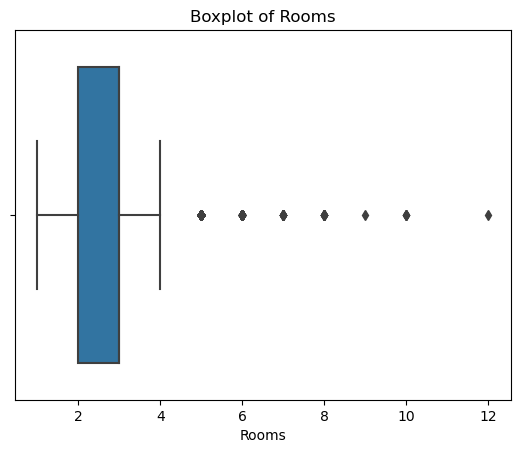

In [284]:
# for Rooms: plotting the boxplot
sns.boxplot(x=data['Rooms'])
plt.title('Boxplot of Rooms')
plt.show()

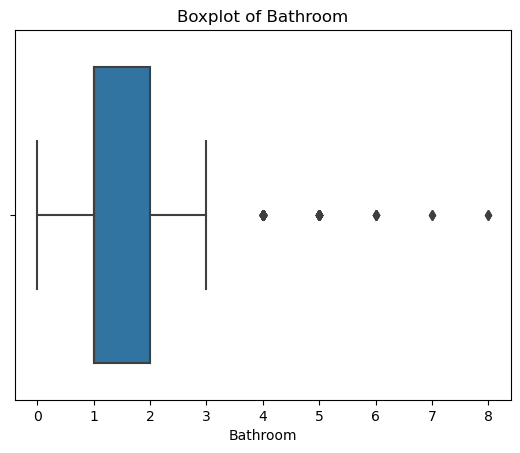

In [285]:
# for Bathroom: plotting the boxplot
sns.boxplot(x=data['Bathroom'])
plt.title('Boxplot of Bathroom')
plt.show()

In [286]:
#As Rooms cannot have values like 12 which is unlikely we are removing such values
#As Bathrooms cannot have values like 8  which is unlikely we are removing such values
#Assuming the maximum reasonable number of rooms as 5
max_rooms = 5
data['Rooms'] = data['Rooms'].apply(lambda x: max_rooms if x > max_rooms else x)

# Assuming the maximum reasonable number of bathrooms as 4
max_bathrooms = 4
data['Bathroom'] = data['Bathroom'].apply(lambda x: max_bathrooms if x > max_bathrooms else x)

# 11. Label Encoder

In [287]:
data.dtypes

Unnamed: 0                                        int64
Suburb                                         category
Address                                        category
Rooms                                             int64
Price                                           float64
SellerG                                        category
Date                                     datetime64[ns]
Distance                                        float64
Postcode                                          int64
Bathroom                                          int64
Car                                               int64
Landsize                                        float64
BuildingArea                                    float64
YearBuilt                                         int64
CouncilArea                                    category
Lattitude                                       float64
Longtitude                                      float64
Propertycount                                   

In [288]:
data.Suburb.unique()

['Abbotsford', 'Airport West', 'Albert Park', 'Alphington', 'Altona', ..., 'Laverton', 'Lilydale', 'Plumpton', 'croydon', 'Monbulk']
Length: 329
Categories (329, object): ['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale', ..., 'Yallambie', 'Yarra Glen', 'Yarraville', 'croydon']

In [289]:
data.Suburb.value_counts()

Reservoir         541
Bentleigh East    368
Richmond          333
Preston           312
Brunswick         286
                 ... 
Healesville         1
Heatherton          1
Tecoma              1
Upwey               1
croydon             1
Name: Suburb, Length: 329, dtype: int64

In [290]:
#using label encoder to convert categorical values to numeric
label_encoder = LabelEncoder()
data['Suburb_encoded'] = label_encoder.fit_transform(data['Suburb'])
data['SellerG_encoded'] = label_encoder.fit_transform(data['SellerG'])
data['CouncilArea_encoded'] = label_encoder.fit_transform(data['CouncilArea'])
data.drop(['Suburb',  'SellerG', 'CouncilArea'], axis=1, inplace=True)

In [291]:
data.dtypes

Unnamed: 0                                        int64
Address                                        category
Rooms                                             int64
Price                                           float64
Date                                     datetime64[ns]
Distance                                        float64
Postcode                                          int64
Bathroom                                          int64
Car                                               int64
Landsize                                        float64
BuildingArea                                    float64
YearBuilt                                         int64
Lattitude                                       float64
Longtitude                                      float64
Propertycount                                     int64
Type_t                                            uint8
Type_u                                            uint8
Method_S                                        

# 12. Detecting Outliers

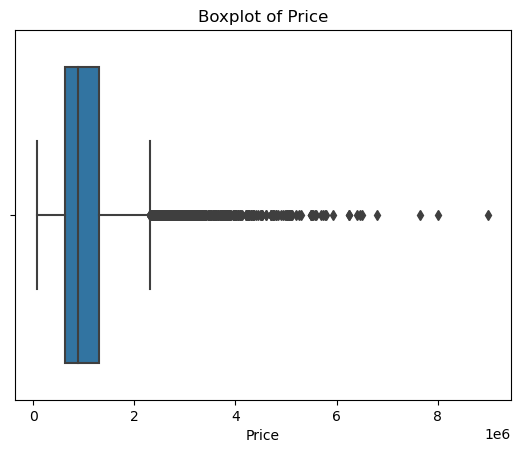

In [292]:
# Boxplot for Price
sns.boxplot(x=data['Price'])
plt.title('Boxplot of Price')
plt.show()

In [293]:
#Removing the outliers in Price using Quantile
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
filter = (data['Price'] >= Q1 - 1.5 * IQR) & (data['Price'] <= Q3 + 1.5 *IQR)
data = data.loc[filter]

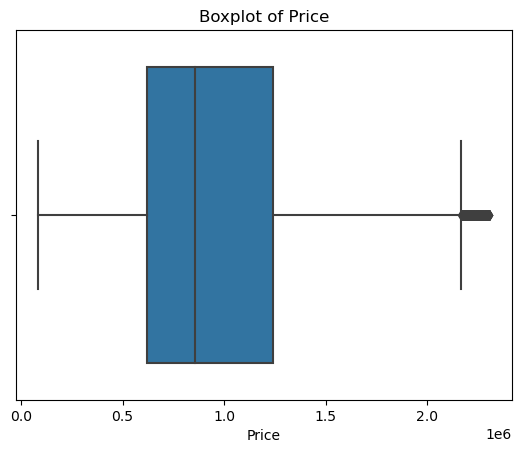

In [294]:
sns.boxplot(x=data['Price'])
plt.title('Boxplot of Price')
plt.show()

# 13. Resetting the index

In [295]:
#Resetting the index 
data = data.reset_index(drop=True)
data

Unnamed: 0           Address  Rooms      Price       Date  Distance  \
0               1      85 Turner St      2  1480000.0 2016-03-12       2.5   
1               2   25 Bloomburg St      2  1035000.0 2016-04-02       2.5   
2               4      5 Charles St      3  1465000.0 2017-04-03       2.5   
3               5  40 Federation La      3   850000.0 2017-04-03       2.5   
4               6       55a Park St      4  1600000.0 2016-04-06       2.5   
...           ...               ...    ...        ...        ...       ...   
17538       23539       83 Power St      3  1170000.0 2017-08-26       6.8   
17539       23540   8/2 Thompson St      2   622500.0 2017-08-26       6.8   
17540       23544      17 Amaroo Wy      4  1100000.0 2017-08-26      12.7   
17541       23545        6 Agnes St      4  1285000.0 2017-08-26       6.3   
17542       23546     33 Freeman St      4  1050000.0 2017-08-26       6.3   

       Postcode  Bathroom  Car    Landsize  ...  Method  \
0          3067         1    1  202.000000  ...       S   
1          3067         1    0  156.000000  ...       S   
2          3067         2    0  134.000000  ...      SP   
3          3067         2    1   94.000000  ...      PI   
4          3067         1    2  120.000000  ...      VB   
...         ...       ...  ...         ...  ...     ...   
17538      3016         2    4  436.000000  ...       S   
17539      3016         2    1  278.689909  ...      SP   
17540      3085         3    2  554.104157  ...       S   
17541      3013         1    1  362.000000  ...      SP   
17542      3013         2    2  452.406282  ...      VB   

                  Regionname  Year  Month  Day  Price_per_sqm  BuildingAge  \
0      Northern Metropolitan  2016      3   12    7326.732673           53   
1      Northern Metropolitan  2016      4    2    6634.615385          123   
2      Northern Metropolitan  2017      4    3   10932.835821          123   
3      Northern Metropolitan  2017      4    3    9042.553191           53   
4      Northern Metropolitan  2016      4    6   13333.333333            9   
...                      ...   ...    ...  ...            ...          ...   
17538   Western Metropolitan  2017      8   26    2683.486239           26   
17539   Western Metropolitan  2017      8   26    2233.665376           13   
17540  Northern Metropolitan  2017      8   26    1985.186333           53   
17541   Western Metropolitan  2017      8   26    3549.723757          103   
17542   Western Metropolitan  2017      8   26    2320.922680           73   

       Suburb_encoded  SellerG_encoded  CouncilArea_encoded  
0                   0               29                   32  
1                   0               29                   32  
2                   0               29                   32  
3                   0               29                   32  
4                   0              178                   32  
...               ...              ...                  ...  
17538             319              222                   10  
17539             319              100                   10  
17540             325               38                    0  
17541             327              273                   16  
17542             327              273                   16  

[17543 rows x 39 columns]

In [296]:
#removing the column unnamed
data.drop(columns=['Unnamed: 0'], inplace=True)

In [297]:
data.isnull().sum()

Address                                  0
Rooms                                    0
Price                                    0
Date                                     0
Distance                                 0
Postcode                                 0
Bathroom                                 0
Car                                      0
Landsize                                 0
BuildingArea                             0
YearBuilt                                0
Lattitude                                0
Longtitude                               0
Propertycount                            0
Type_t                                   0
Type_u                                   0
Method_S                                 0
Method_SA                                0
Method_SP                                0
Method_VB                                0
Regionname_Eastern Victoria              0
Regionname_Northern Metropolitan         0
Regionname_Northern Victoria             0
Regionname_

# 14. Scaling the Dataset

In [298]:
housing_data = data.copy()
housing_data.head()

Address  Rooms      Price       Date  Distance  Postcode  \
0      85 Turner St      2  1480000.0 2016-03-12       2.5      3067   
1   25 Bloomburg St      2  1035000.0 2016-04-02       2.5      3067   
2      5 Charles St      3  1465000.0 2017-04-03       2.5      3067   
3  40 Federation La      3   850000.0 2017-04-03       2.5      3067   
4       55a Park St      4  1600000.0 2016-04-06       2.5      3067   

   Bathroom  Car  Landsize  BuildingArea  ...  Method             Regionname  \
0         1    1     202.0     76.747006  ...       S  Northern Metropolitan   
1         1    0     156.0     79.000000  ...       S  Northern Metropolitan   
2         2    0     134.0    150.000000  ...      SP  Northern Metropolitan   
3         2    1      94.0     48.665943  ...      PI  Northern Metropolitan   
4         1    2     120.0    142.000000  ...      VB  Northern Metropolitan   

   Year  Month  Day  Price_per_sqm  BuildingAge  Suburb_encoded  \
0  2016      3   12    7326.732673           53               0   
1  2016      4    2    6634.615385          123               0   
2  2017      4    3   10932.835821          123               0   
3  2017      4    3    9042.553191           53               0   
4  2016      4    6   13333.333333            9               0   

   SellerG_encoded  CouncilArea_encoded  
0               29                   32  
1               29                   32  
2               29                   32  
3               29                   32  
4              178                   32  

[5 rows x 38 columns]

In [299]:
num_cols = ['Distance','Landsize', 'BuildingArea']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Exploratory Data Analysis (EDA)

# 1. Correlation Matrix Using Heatmap

/var/folders/kp/xfqjcgz93rx88km955rkxtjm0000gn/T/ipykernel_37497/2791608965.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


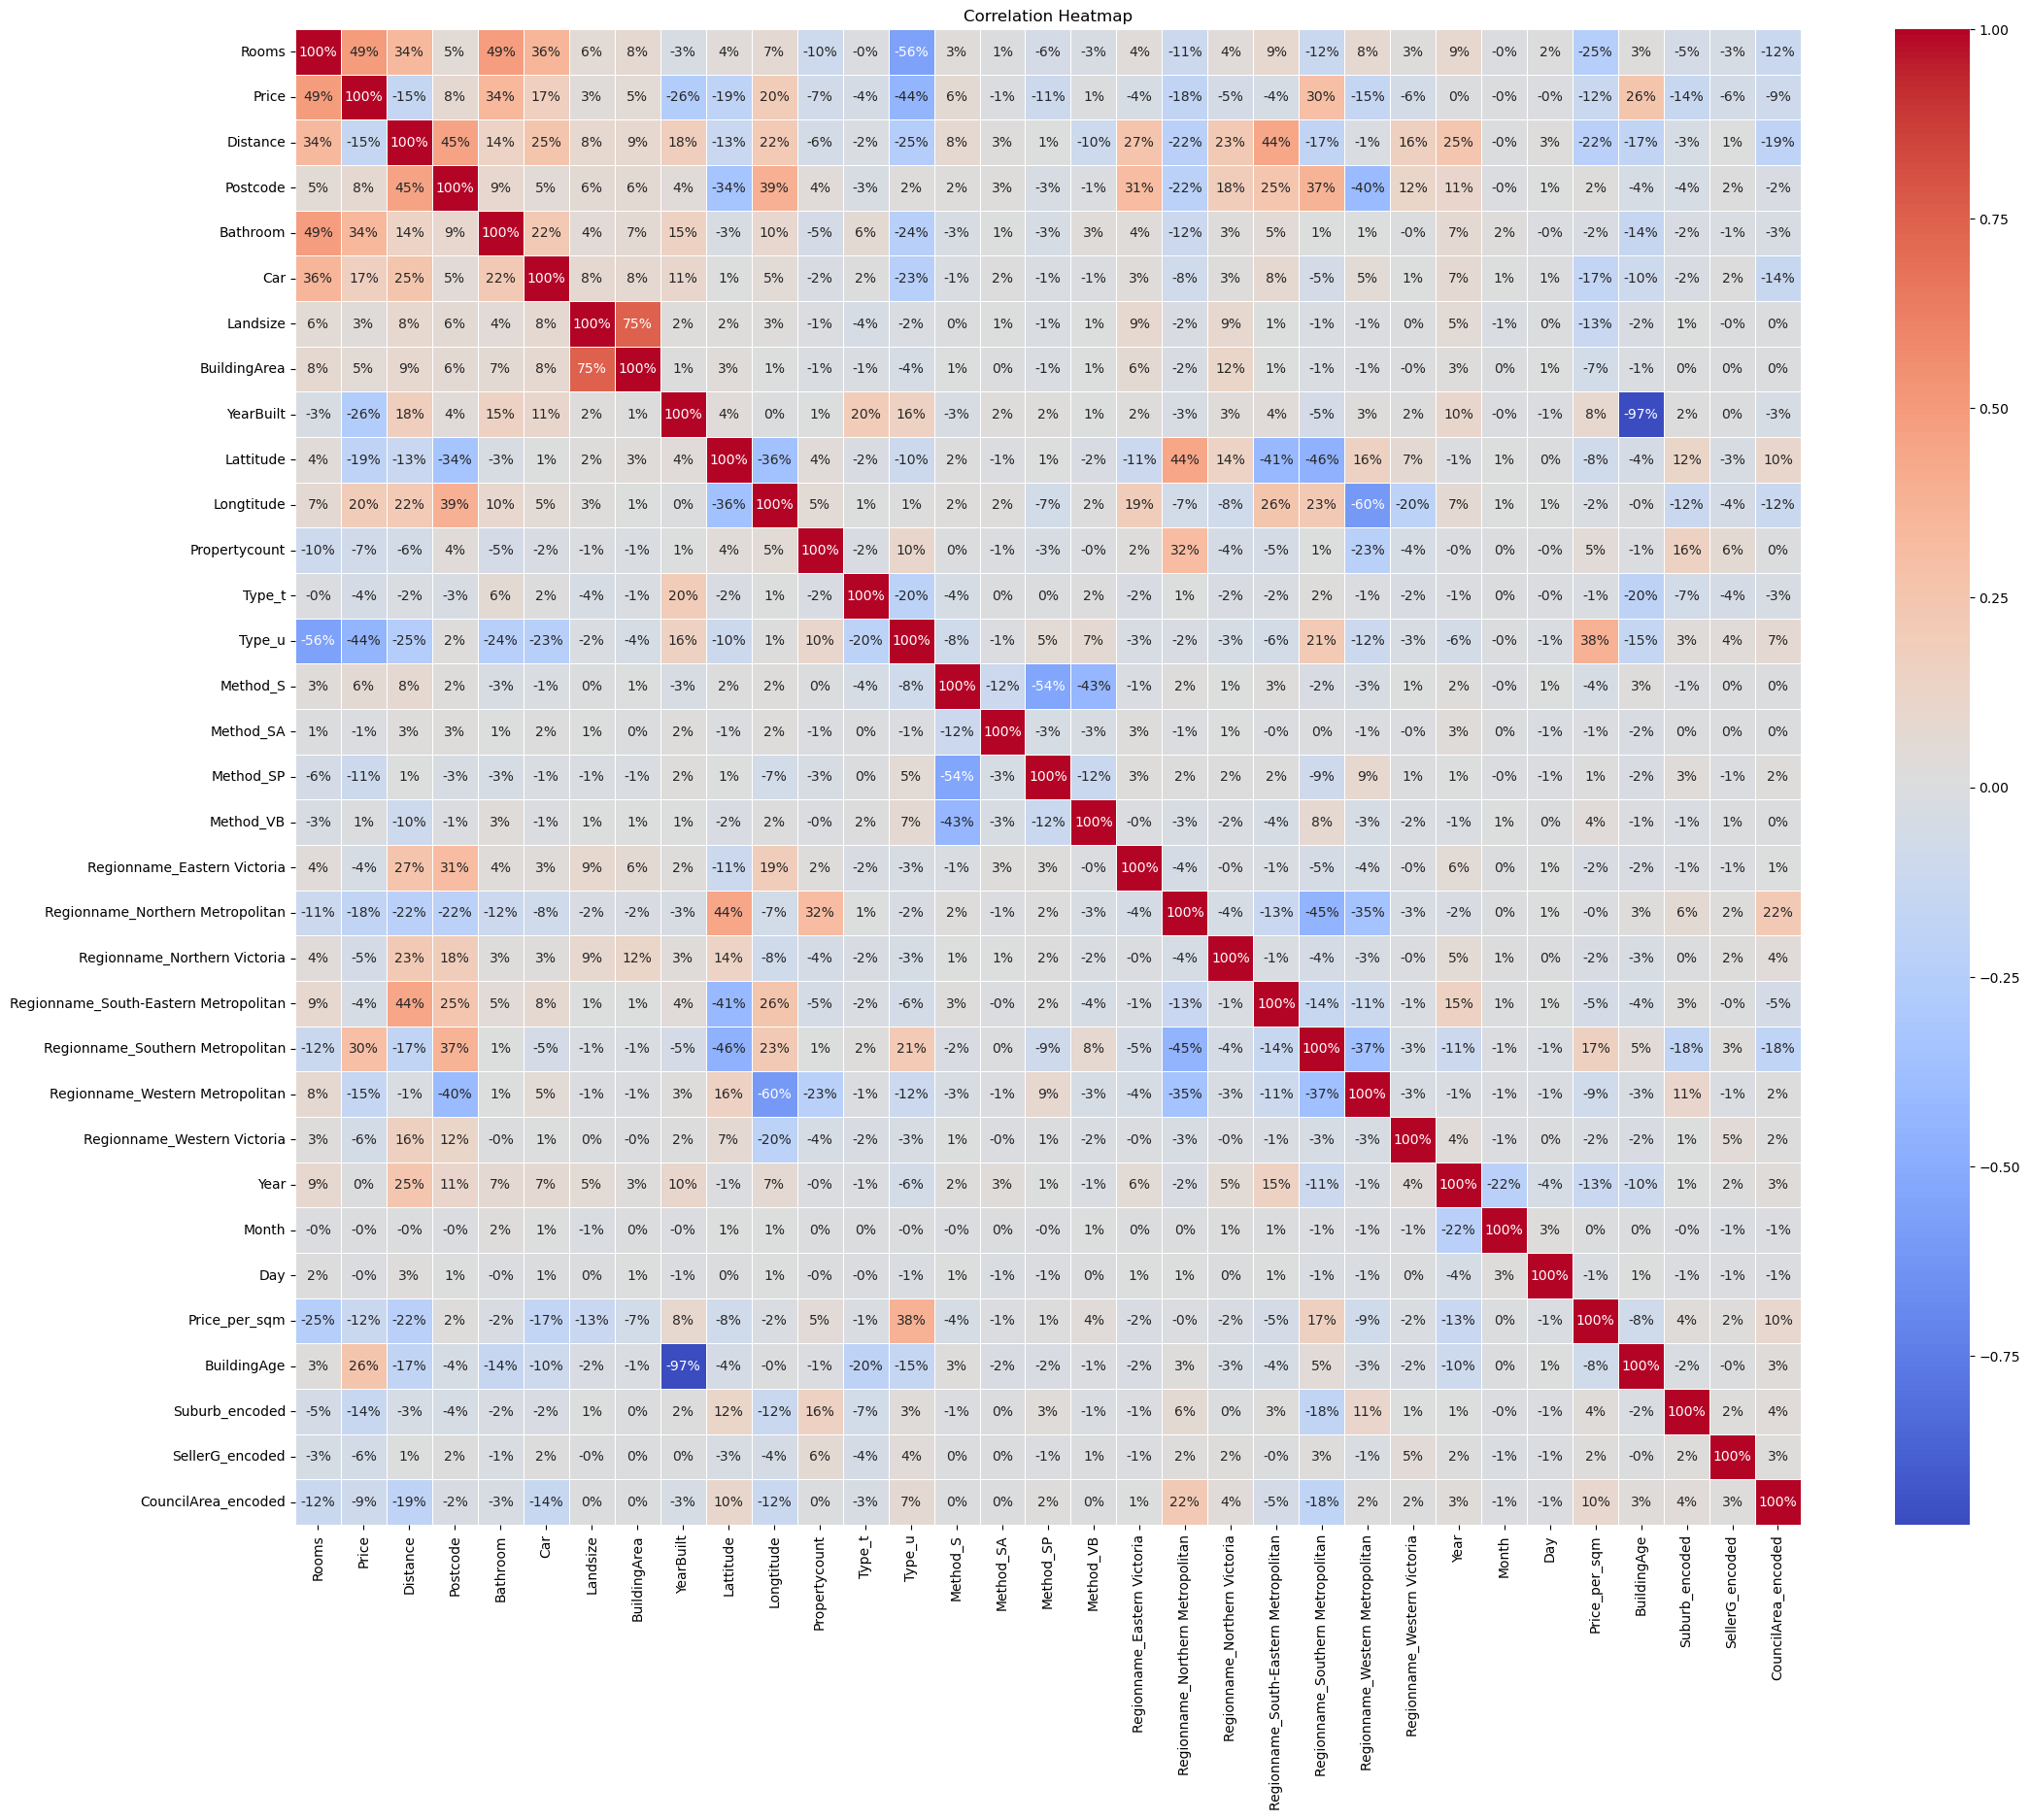

In [300]:
correlation_matrix = data.corr()
plt.figure(figsize=(25, 20))
sns.heatmap (correlation_matrix, annot=True, cmap='coolwarm', fmt='.0%' ,linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 2. CountPlot

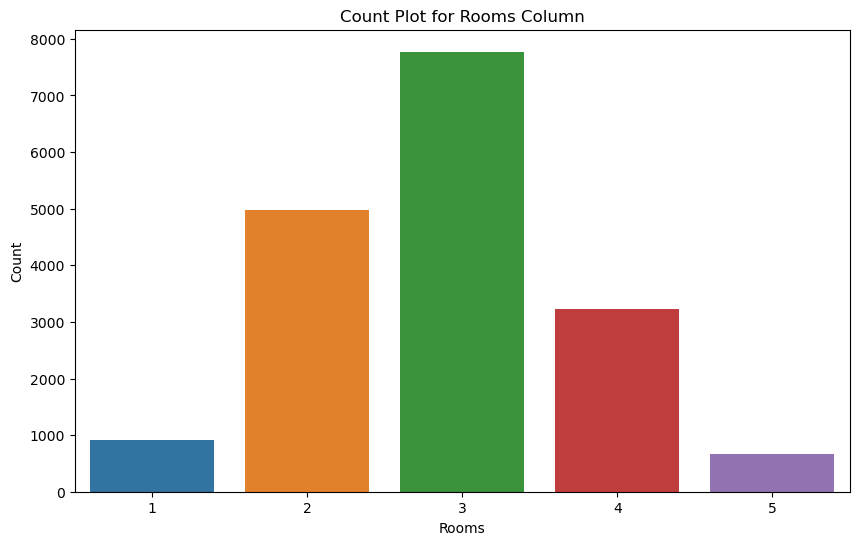

In [301]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Rooms')
plt.title('Count Plot for Rooms Column')
plt.xlabel('Rooms')
plt.ylabel('Count')
plt.show()

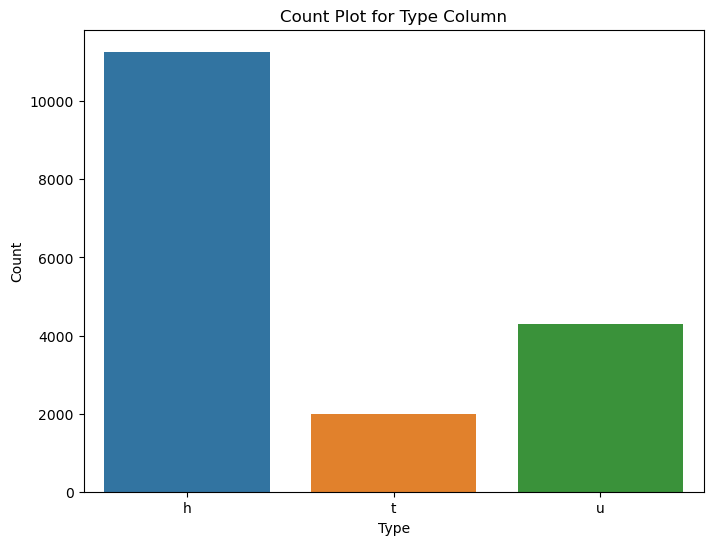

In [302]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Type')
plt.title('Count Plot for Type Column')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

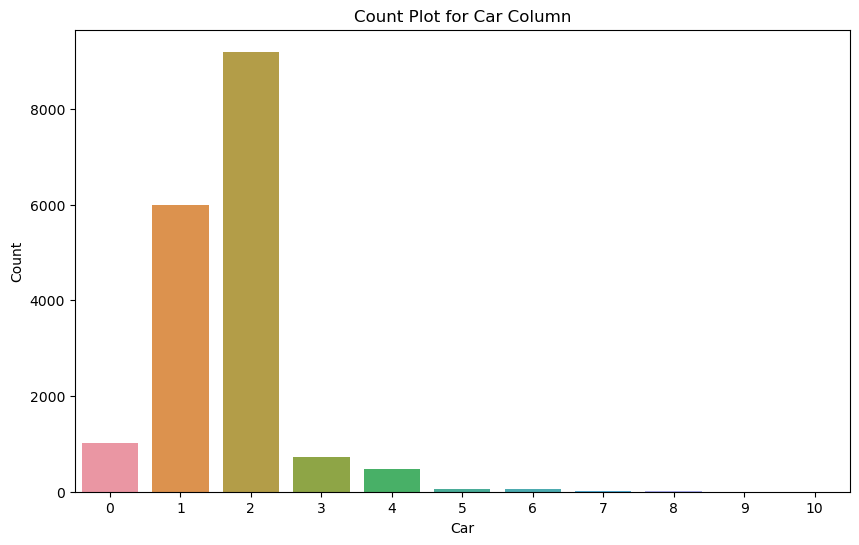

In [303]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Car')
plt.title('Count Plot for Car Column')
plt.xlabel('Car')
plt.ylabel('Count')
plt.show()

# 3. Univariate Non Graphical EDA

In [304]:
# Summary statistics for numeric columns
numeric_summary = data.describe()
numeric_summary

Rooms         Price      Distance      Postcode      Bathroom  \
count  17543.000000  1.754300e+04  1.754300e+04  17543.000000  17543.000000   
mean       2.872770  9.597913e+05  1.620117e-16   3105.848031      1.395998   
std        0.899018  4.438280e+05  1.000029e+00     96.607316      0.596134   
min        1.000000  8.500000e+04 -1.727967e+00   3000.000000      0.000000   
25%        2.000000  6.220000e+05 -6.923690e-01   3044.000000      1.000000   
50%        3.000000  8.550000e+05 -1.005989e-01   3083.000000      1.000000   
75%        3.000000  1.240000e+06  4.911712e-01   3149.000000      2.000000   
max        5.000000  2.305000e+06  6.178740e+00   3978.000000      4.000000   

                Car      Landsize  BuildingArea     YearBuilt     Lattitude  \
count  17543.000000  1.754300e+04  1.754300e+04  17543.000000  17543.000000   
mean       1.666876  3.564257e-17  6.561473e-17   1968.599042    -37.808498   
std        0.857715  1.000029e+00  1.000029e+00     24.581302      0.074284   
min        0.000000 -4.292649e-01 -3.541768e-01   1830.000000    -38.182550   
25%        1.000000 -2.270790e-01 -1.377194e-01   1970.000000    -37.844280   
50%        2.000000  2.436279e-02  4.495810e-03   1970.000000    -37.809849   
75%        2.000000  5.221522e-02  2.138254e-02   1970.000000    -37.764620   
max       10.000000  5.856461e+01  9.898194e+01   2018.000000    -37.408530   

       ...  Regionname_Western Metropolitan  Regionname_Western Victoria  \
count  ...                     17543.000000                 17543.000000   
mean   ...                         0.220031                     0.002394   
std    ...                         0.414279                     0.048873   
min    ...                         0.000000                     0.000000   
25%    ...                         0.000000                     0.000000   
50%    ...                         0.000000                     0.000000   
75%    ...                         0.000000                     0.000000   
max    ...                         1.000000                     1.000000   

               Year         Month           Day  Price_per_sqm   BuildingAge  \
count  17543.000000  17543.000000  17543.000000   1.754300e+04  17543.000000   
mean    2016.563929      6.735222     16.468278   7.175560e+04     54.445078   
std        0.495910      2.726263      7.968843   2.213058e+05     25.263923   
min     2016.000000      1.000000      2.000000  -7.968523e+04      5.000000   
25%     2016.000000      5.000000      9.000000   1.312442e+03     53.000000   
50%     2017.000000      7.000000     16.000000   2.195513e+03     53.000000   
75%     2017.000000      9.000000     24.000000   4.081879e+03     53.000000   
max     2017.000000     12.000000     30.000000   2.300000e+06    827.000000   

       Suburb_encoded  SellerG_encoded  CouncilArea_encoded  
count    17543.000000     17543.000000         17543.000000  
mean       161.295559       151.703414            14.921222  
std         94.884988        88.169465             9.843315  
min          0.000000         0.000000             0.000000  
25%         71.000000        83.000000             6.000000  
50%        161.000000       157.000000            16.000000  
75%        245.000000       224.000000            23.000000  
max        328.000000       304.000000            33.000000  

[8 rows x 33 columns]

In [305]:
#skewness of the Price column in the data
price_skewness = data['Price'].skew()
price_skewness

0.8341881662892019

In [306]:
#Calculating Central Tendency
mean_price = data['Price'].mean()
median_price = data['Price'].median()
mode_price = data['Price'].mode().values[0]
print(mean_price)
print(median_price)
print(mode_price)

959791.2901442171
855000.0
600000.0


# 4. Scatter Plot

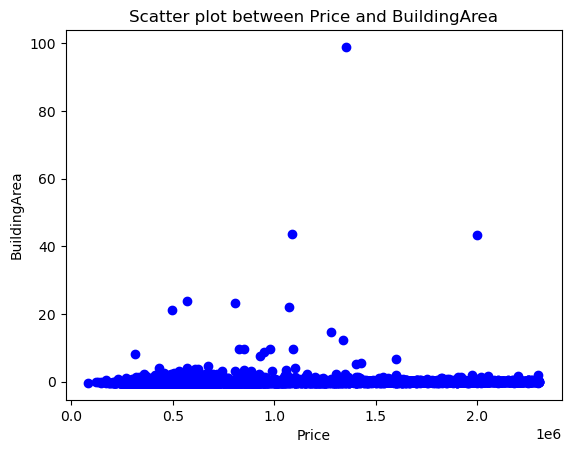

In [307]:
#Scatter plot between Price and Buildingarea
plt.scatter(x=data['Price'],y=data['BuildingArea'], label='Scatter Plot', color='blue', marker='o')
plt.title("Scatter plot between Price and BuildingArea")
plt.xlabel("Price")
plt.ylabel("BuildingArea")
plt.show()

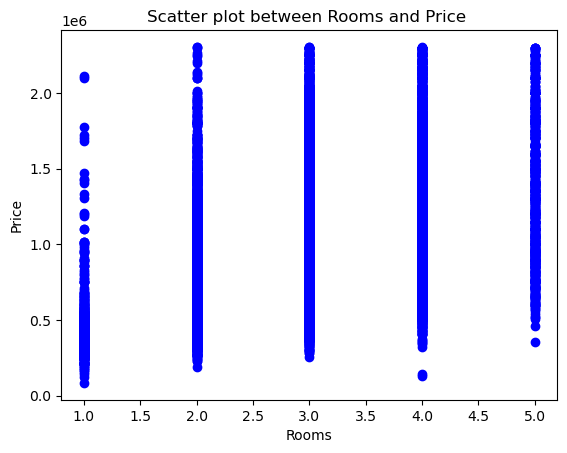

In [308]:
plt.scatter(x=data['Rooms'],y=data['Price'], label='Scatter Plot', color='blue', marker='o')
plt.title("Scatter plot between Rooms and Price ")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()

# 5. Pair Plot

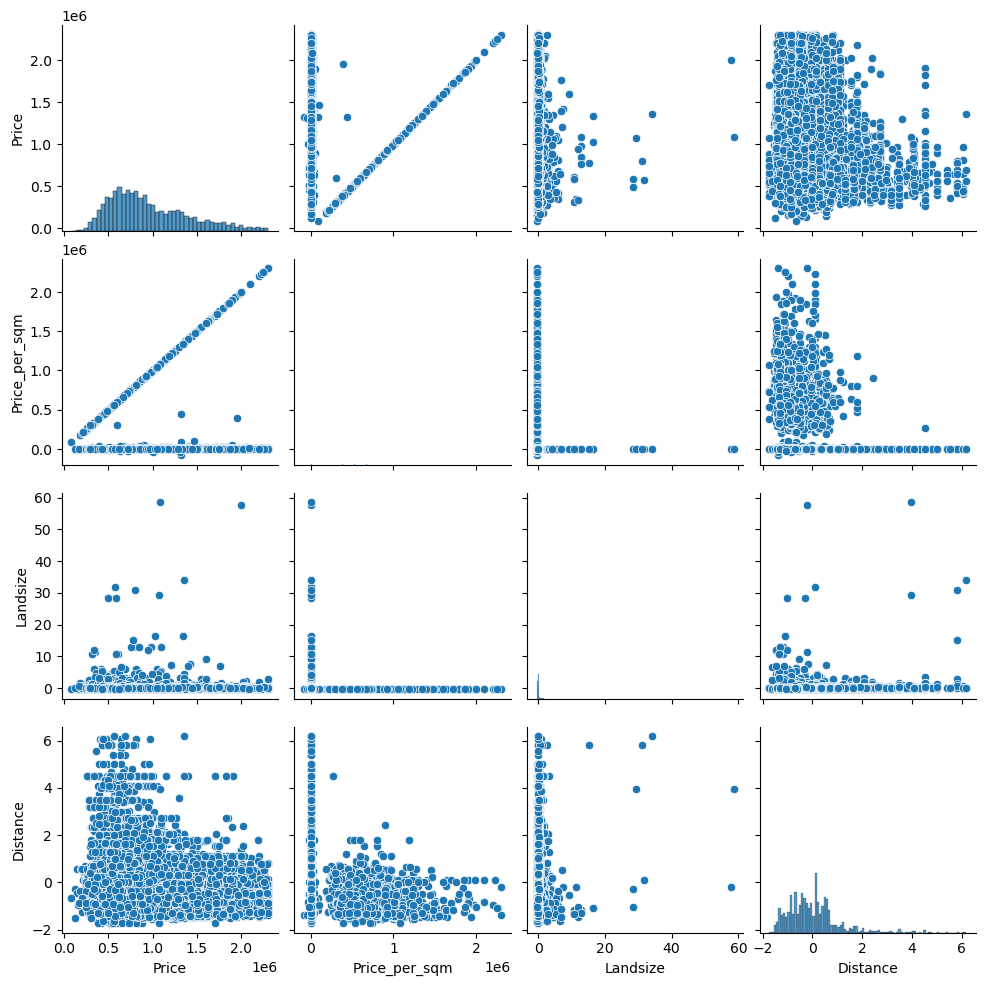

In [309]:
sns.pairplot(data[['Price', 'Price_per_sqm', 'Landsize', 'Distance']])
plt.show()

# 6. Box Plot

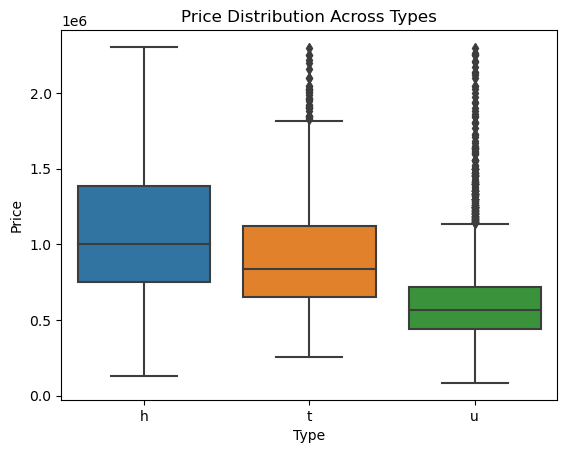

In [310]:
sns.boxplot(x=data['Type'], y=data['Price'])
plt.title('Price Distribution Across Types')
plt.xlabel("Type")
plt.ylabel("Price")
plt.show()

# 7. Histograms

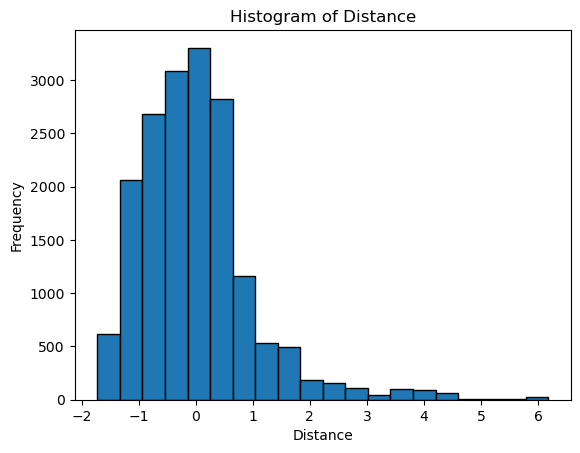

In [311]:
plt.hist(data['Distance'], bins=20, edgecolor='black')
plt.title('Histogram of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# 8. JointPlot

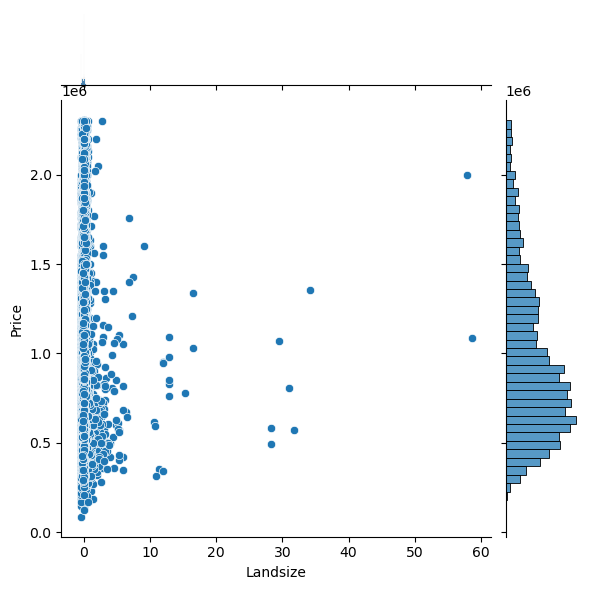

In [312]:
sns.jointplot(x='Landsize', y='Price', data=data, kind='scatter')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.show()

# 9. Lineplot

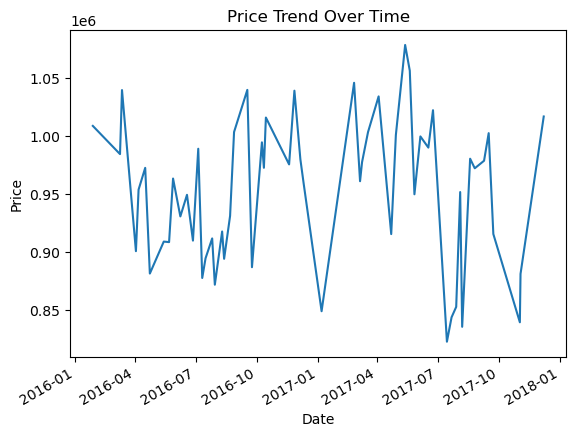

In [313]:
data.groupby('Date')['Price'].mean().plot()
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# 10. DistPlot

/var/folders/kp/xfqjcgz93rx88km955rkxtjm0000gn/T/ipykernel_37497/3304754700.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


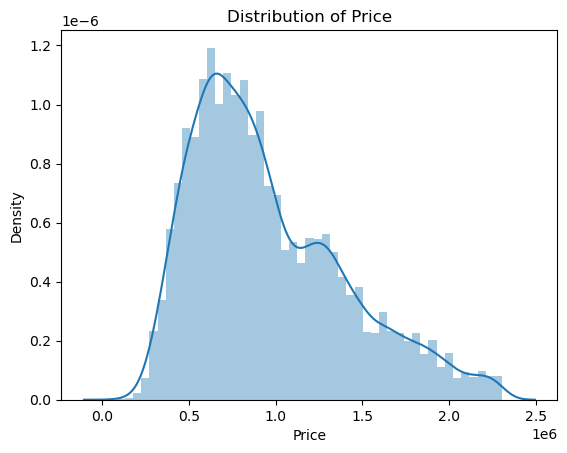

In [314]:
sns.distplot(data['Price'])
plt.title('Distribution of Price')
plt.show()

# 11. Feature Importance

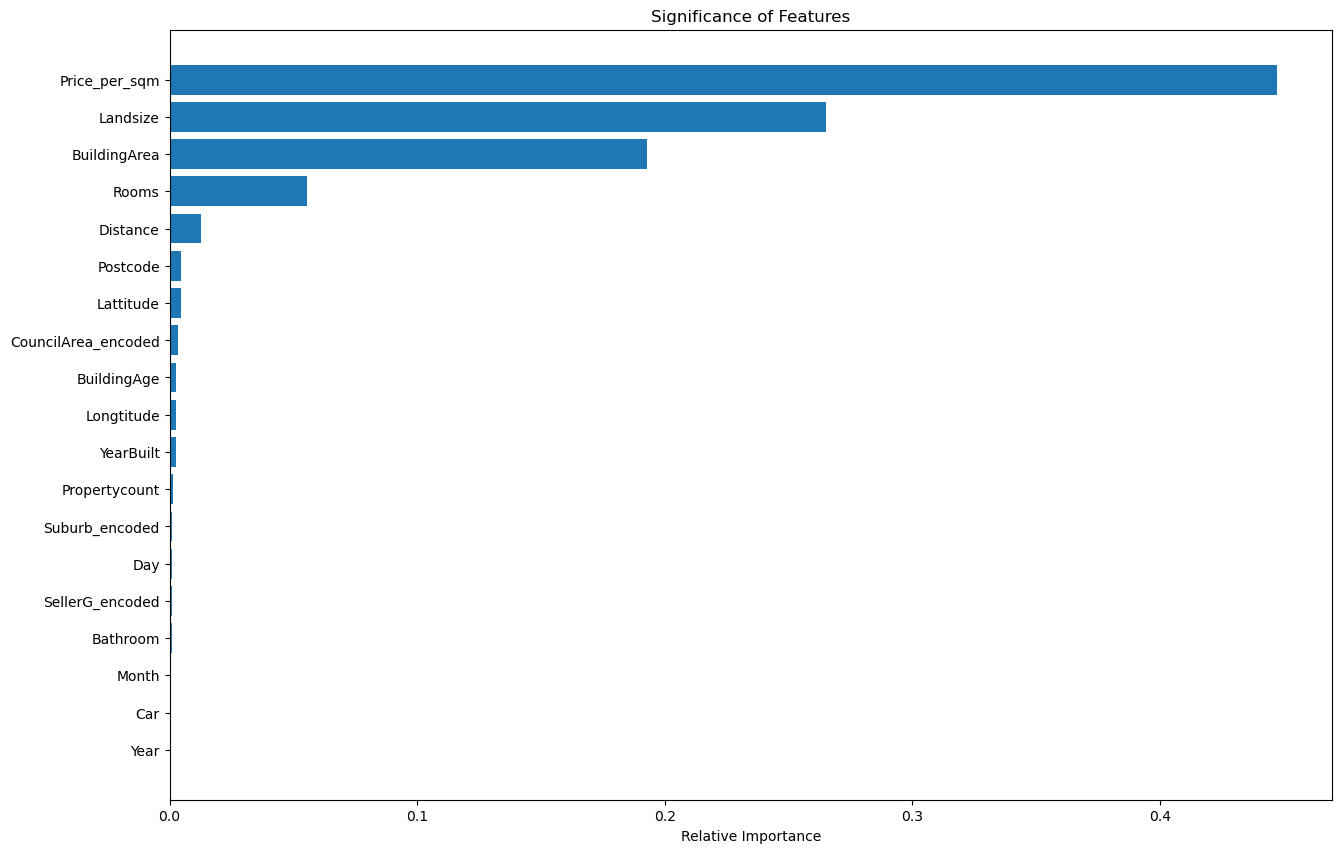

In [315]:
from sklearn.ensemble import RandomForestRegressor
X = data.drop('Price', axis=1).select_dtypes(include=['float64', 'int64'])
y = data['Price']
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(15, 10))
indices = np.argsort(importances)
plt.title('Significance of Features')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


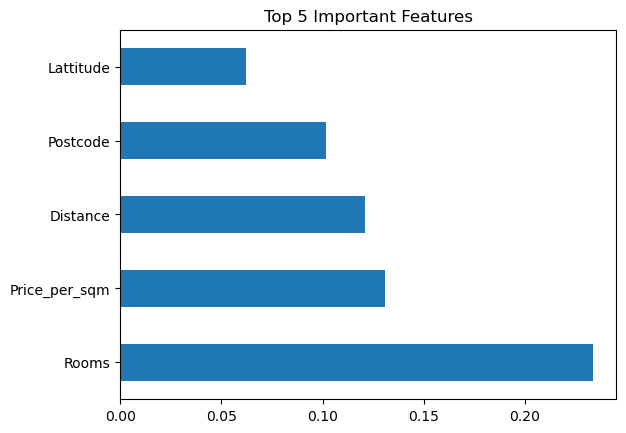

In [316]:
#Extract Important Variables
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
X = data.drop('Price', axis=1).select_dtypes(include=['float64', 'int64'])
y = data['Price']
model.fit(X, y)
feat_importances = pd.Series(model.feature_importances_, index=X.select_dtypes(include=[int, float]).columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Top 5 Important Features')
plt.show()

# 12. Q-Q Plot to Assess the Normality of Price Distribution

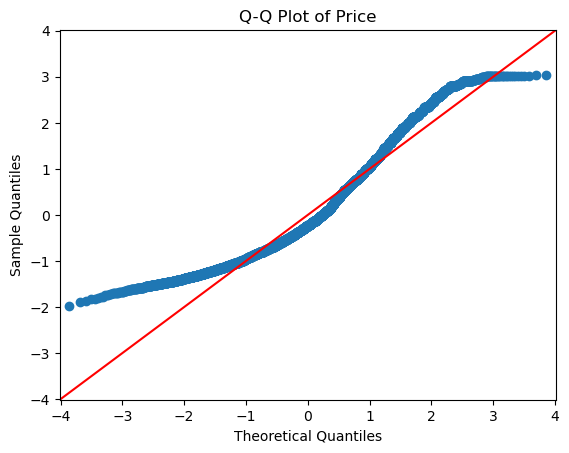

In [317]:
scaler = StandardScaler()
columns_to_scale = ['Price'] 
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
sm.qqplot(data['Price'], line ='45')
plt.title('Q-Q Plot of Price')
plt.show()

# 13. Piechart

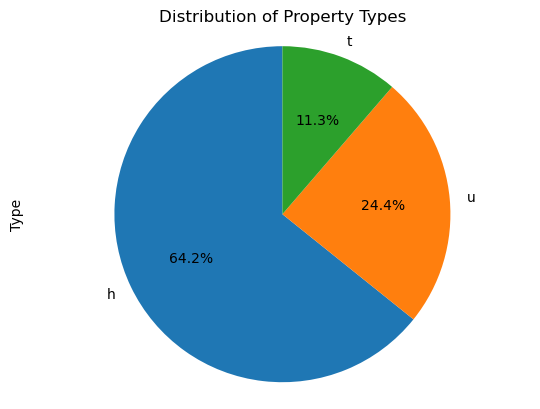

In [318]:
data['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Property Types')
plt.axis('equal')
plt.show()

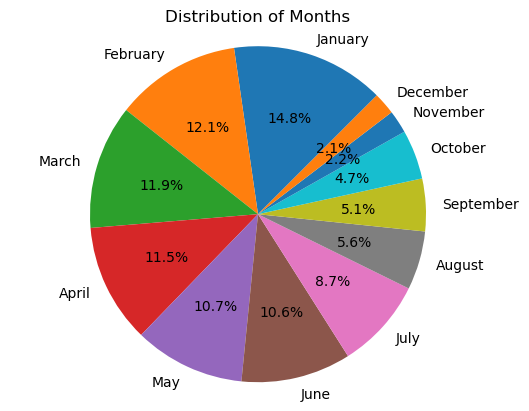

<Figure size 2500x2000 with 0 Axes>

In [319]:
label=['January','February','March','April','May','June','July','August','September','October','November','December']
value_counts = data['Month'].value_counts()
plt.pie(value_counts, labels=label, autopct='%1.1f%%', startangle=45)
plt.title('Distribution of Months')
plt.axis('equal')
plt.figure(figsize=(25, 20))
plt.show()

# PHASE 2

In [320]:
#importing required libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from scipy.stats import norm
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

In [321]:
housing_data.dtypes

Address                                        category
Rooms                                             int64
Price                                           float64
Date                                     datetime64[ns]
Distance                                        float64
Postcode                                          int64
Bathroom                                          int64
Car                                               int64
Landsize                                        float64
BuildingArea                                    float64
YearBuilt                                         int64
Lattitude                                       float64
Longtitude                                      float64
Propertycount                                     int64
Type_t                                            uint8
Type_u                                            uint8
Method_S                                          uint8
Method_SA                                       

In [322]:
housing_data.columns

Index(['Address', 'Rooms', 'Price', 'Date', 'Distance', 'Postcode', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount', 'Type_t', 'Type_u', 'Method_S',
       'Method_SA', 'Method_SP', 'Method_VB', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Type', 'Method', 'Regionname', 'Year',
       'Month', 'Day', 'Price_per_sqm', 'BuildingAge', 'Suburb_encoded',
       'SellerG_encoded', 'CouncilArea_encoded'],
      dtype='object')

In [323]:
#Selecting required columns in the dataset
selected_columns = ['Rooms', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 
                     'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
                     'BuildingAge', 'CouncilArea_encoded', 'Suburb_encoded', 'Year',
                     'Month', 'Day', 'Type_t', 'Type_u', 'Method_S',
                     'Method_SA', 'Method_SP', 'Method_VB', 'Regionname_Eastern Victoria',
                     'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
                     'Regionname_South-Eastern Metropolitan',
                     'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
                     'Regionname_Western Victoria',
                     'SellerG_encoded']

In [324]:
# Features used for prediction
input_data = housing_data[selected_columns]
# Target variable to be predicted
output_data= housing_data[['Price']]

In [325]:
input_data.head()

Rooms  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  \
0      2       2.5      3067         1    1     202.0     76.747006   
1      2       2.5      3067         1    0     156.0     79.000000   
2      3       2.5      3067         2    0     134.0    150.000000   
3      3       2.5      3067         2    1      94.0     48.665943   
4      4       2.5      3067         1    2     120.0    142.000000   

   YearBuilt  Lattitude  Longtitude  ...  Method_SP  Method_VB  \
0       1970   -37.7996    144.9984  ...          0          0   
1       1900   -37.8079    144.9934  ...          0          0   
2       1900   -37.8093    144.9944  ...          1          0   
3       1970   -37.7969    144.9969  ...          0          0   
4       2014   -37.8072    144.9941  ...          0          1   

   Regionname_Eastern Victoria  Regionname_Northern Metropolitan  \
0                            0                                 1   
1                            0                                 1   
2                            0                                 1   
3                            0                                 1   
4                            0                                 1   

   Regionname_Northern Victoria  Regionname_South-Eastern Metropolitan  \
0                             0                                      0   
1                             0                                      0   
2                             0                                      0   
3                             0                                      0   
4                             0                                      0   

   Regionname_Southern Metropolitan  Regionname_Western Metropolitan  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   Regionname_Western Victoria  SellerG_encoded  
0                            0               29  
1                            0               29  
2                            0               29  
3                            0               29  
4                            0              178  

[5 rows x 31 columns]

In [326]:
output_data.head()

Price
0  1480000.0
1  1035000.0
2  1465000.0
3   850000.0
4  1600000.0

### Splitting the Dataset

In [327]:
# Splitting the dataset into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(input_data,output_data,test_size = 0.25)

In [328]:
X_train.shape

(13157, 31)

In [329]:
X_test.shape

(4386, 31)

In [330]:
Y_train.shape

(13157, 1)

In [331]:
Y_test.shape

(4386, 1)

In [332]:
# Creating an empty DataFrame to store model comparison metrics
model_comparison = pd.DataFrame([], columns=['Algorithm', 'Prediction_score', 'Mean_Absolute_Error'])

# Algorithm 1. Decision Tree

In [333]:
decision_tree = DecisionTreeRegressor(random_state=42)

In [334]:
decision_tree.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [335]:
DT_pred = decision_tree.predict(X_test)

### Evaluation of model using various metrics

In [336]:
r2_score_dt= r2_score(Y_test,DT_pred)
print("R-squared score using Decision Tree regression",r2_score_dt)

R-squared score using Decision Tree regression 0.6086946940793614


In [337]:
mae_dt= mean_absolute_error(Y_test,DT_pred)
print("Mean Absolute Error using Decision Tree regression",mae_dt)

Mean Absolute Error using Decision Tree regression 193390.613999088


In [338]:
mse_dt= mean_squared_error(Y_test,DT_pred)
rmse_dt= np.sqrt(mse_dt)
print("Root Mean Square Error using Decision Tree regression",rmse_dt)

Root Mean Square Error using Decision Tree regression 275645.9714963617


In [339]:
pred_score_dt= decision_tree.score(X_test, Y_test)*100
print("Accuracy using Decision Tree regression",pred_score_dt)

Accuracy using Decision Tree regression 60.86946940793614


### Visualisation

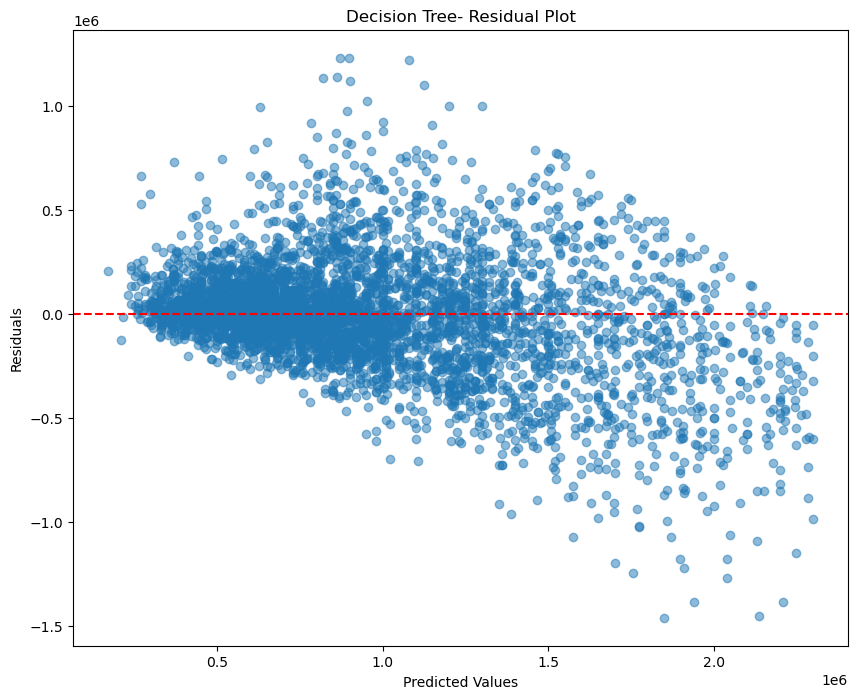

In [340]:
# Scatter plot of decision tree predicted values vs residuals

#Ensuring Y_test is 1-D array
Y_test = Y_test.squeeze()
DT_pred = DT_pred.ravel()

# calculating the residuals
residuals = Y_test - DT_pred

plt.figure(figsize=(10, 8))
plt.scatter(DT_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Decision Tree- Residual Plot")
plt.show()

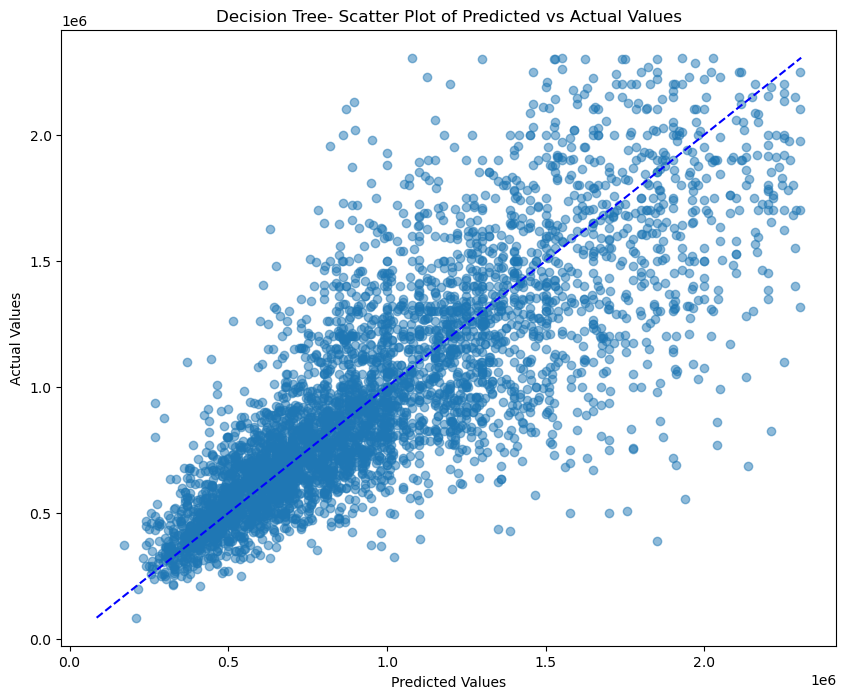

In [341]:
# scatter plot between actual and predicted values
plt.figure(figsize=(10, 8))
plt.scatter(DT_pred, Y_test, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'b--')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Decision Tree- Scatter Plot of Predicted vs Actual Values")
plt.show()

In [342]:
model_comparison = model_comparison.append({
    'Algorithm': decision_tree.__class__.__name__,
    'Prediction_score': pred_score_dt,
    'Mean_Absolute_Error' : mae_dt
}, ignore_index=True)
model_comparison

/var/folders/kp/xfqjcgz93rx88km955rkxtjm0000gn/T/ipykernel_37497/906741114.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({


Algorithm  Prediction_score  Mean_Absolute_Error
0  DecisionTreeRegressor         60.869469        193390.613999

# Algorithm 2. Linear Regression

In [343]:
linear_regression = LinearRegression() 
linear_regression.fit(X_train,Y_train) 

LinearRegression()

In [344]:
lr_pred= linear_regression.predict(X_test)

### Evaluation of model using various metrics

In [345]:
r2_score_lr= r2_score(Y_test,lr_pred)
print("R-squared score using Linear regression",r2_score_lr)

R-squared score using Linear regression 0.636081270087905


In [346]:
mae_lr= mean_absolute_error(Y_test,lr_pred)
print("Mean Absolute Error using Linear regression",mae_lr)

Mean Absolute Error using Linear regression 205623.0546559237


In [347]:
mse_lr= mean_squared_error(Y_test,lr_pred)
rmse_lr= np.sqrt(mse_lr)
print("Root Mean Square Error using Linear regression",rmse_lr)

Root Mean Square Error using Linear regression 265825.09969081404


In [348]:
pred_score_lr= linear_regression.score(X_test, Y_test)*100
print("Accuracy using Linear regression",pred_score_lr)

Accuracy using Linear regression 63.608127008790504


### Visualisation

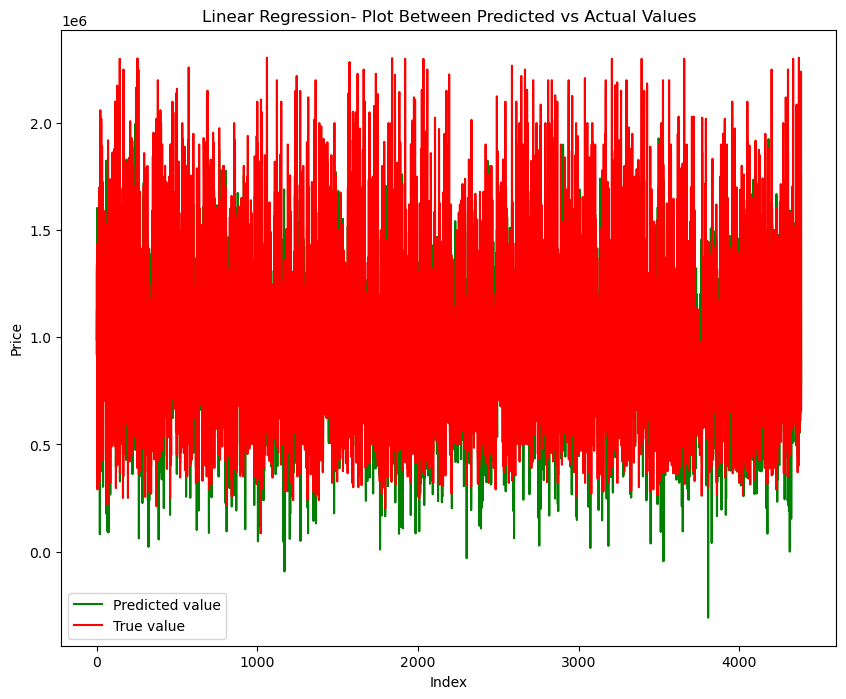

In [349]:
# Line plot between Predicted vs Actual values

# Generates the range of data points
data_points = range(X_test.shape[0])  
plt.figure(figsize=(10, 8)) 
plt.plot(data_points, lr_pred, 'g', label='Predicted value')
plt.plot(data_points, Y_test, 'r', label='True value')
plt.title('Linear Regression- Plot Between Predicted vs Actual Values')
plt.ylabel('Price')
plt.xlabel('Index')
plt.legend()
plt.show()

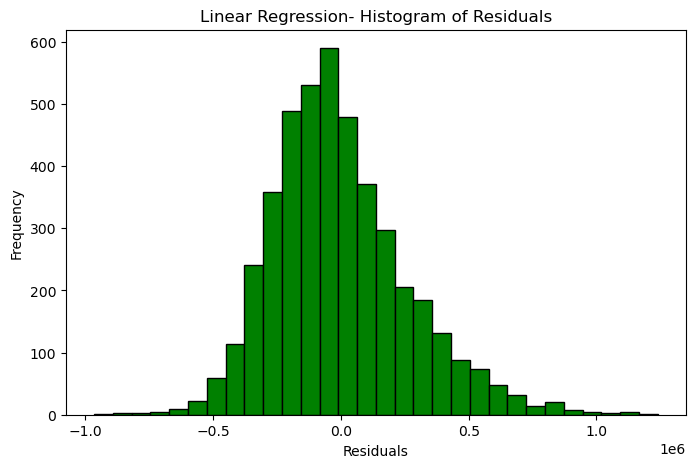

In [350]:
# Histogram of residuals graph

#Ensuring Y_test is 1-D array
Y_test = Y_test.squeeze()
lr_pred = lr_pred.ravel()

residuals = Y_test - lr_pred
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black', color='green')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Linear Regression- Histogram of Residuals")
plt.show()

In [351]:
model_comparison = model_comparison.append({
    'Algorithm': linear_regression.__class__.__name__,
    'Prediction_score': pred_score_lr,
    'Mean_Absolute_Error' : mae_lr
}, ignore_index=True)
model_comparison

/var/folders/kp/xfqjcgz93rx88km955rkxtjm0000gn/T/ipykernel_37497/1316243175.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({


Algorithm  Prediction_score  Mean_Absolute_Error
0  DecisionTreeRegressor         60.869469        193390.613999
1       LinearRegression         63.608127        205623.054656

# Algorithm 3. GradientBoostingRegressor

In [352]:
GBR = GradientBoostingRegressor(n_estimators=100, random_state=42)
GBR.fit(X_train, Y_train)

/Users/saisreereddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [353]:
GBR_pred = GBR.predict(X_test)

### Evaluation of model using various metrics

In [354]:
r2_score_GBR= r2_score(Y_test,GBR_pred)
print("R-squared score using Gradient Boosting Regressor",r2_score_GBR)

R-squared score using Gradient Boosting Regressor 0.7648486528342653


In [355]:
mae_GBR= mean_absolute_error(Y_test,GBR_pred)
print("Mean Absolute Error using Gradient Boosting Regressor",mae_GBR)

Mean Absolute Error using Gradient Boosting Regressor 154690.03585334562


In [356]:
mse_GBR= mean_squared_error(Y_test,GBR_pred)
rmse_GBR= np.sqrt(mse_GBR)
print("Root Mean Square Error using Gradient Boosting Regressor",rmse_GBR)

Root Mean Square Error using Gradient Boosting Regressor 213681.7918875081


In [357]:
pred_score_GBR= GBR.score(X_test, Y_test)*100
print("Accuracy using Gradient Boosting Regressor",pred_score_GBR)

Accuracy using Gradient Boosting Regressor 76.48486528342653


### Visualisation

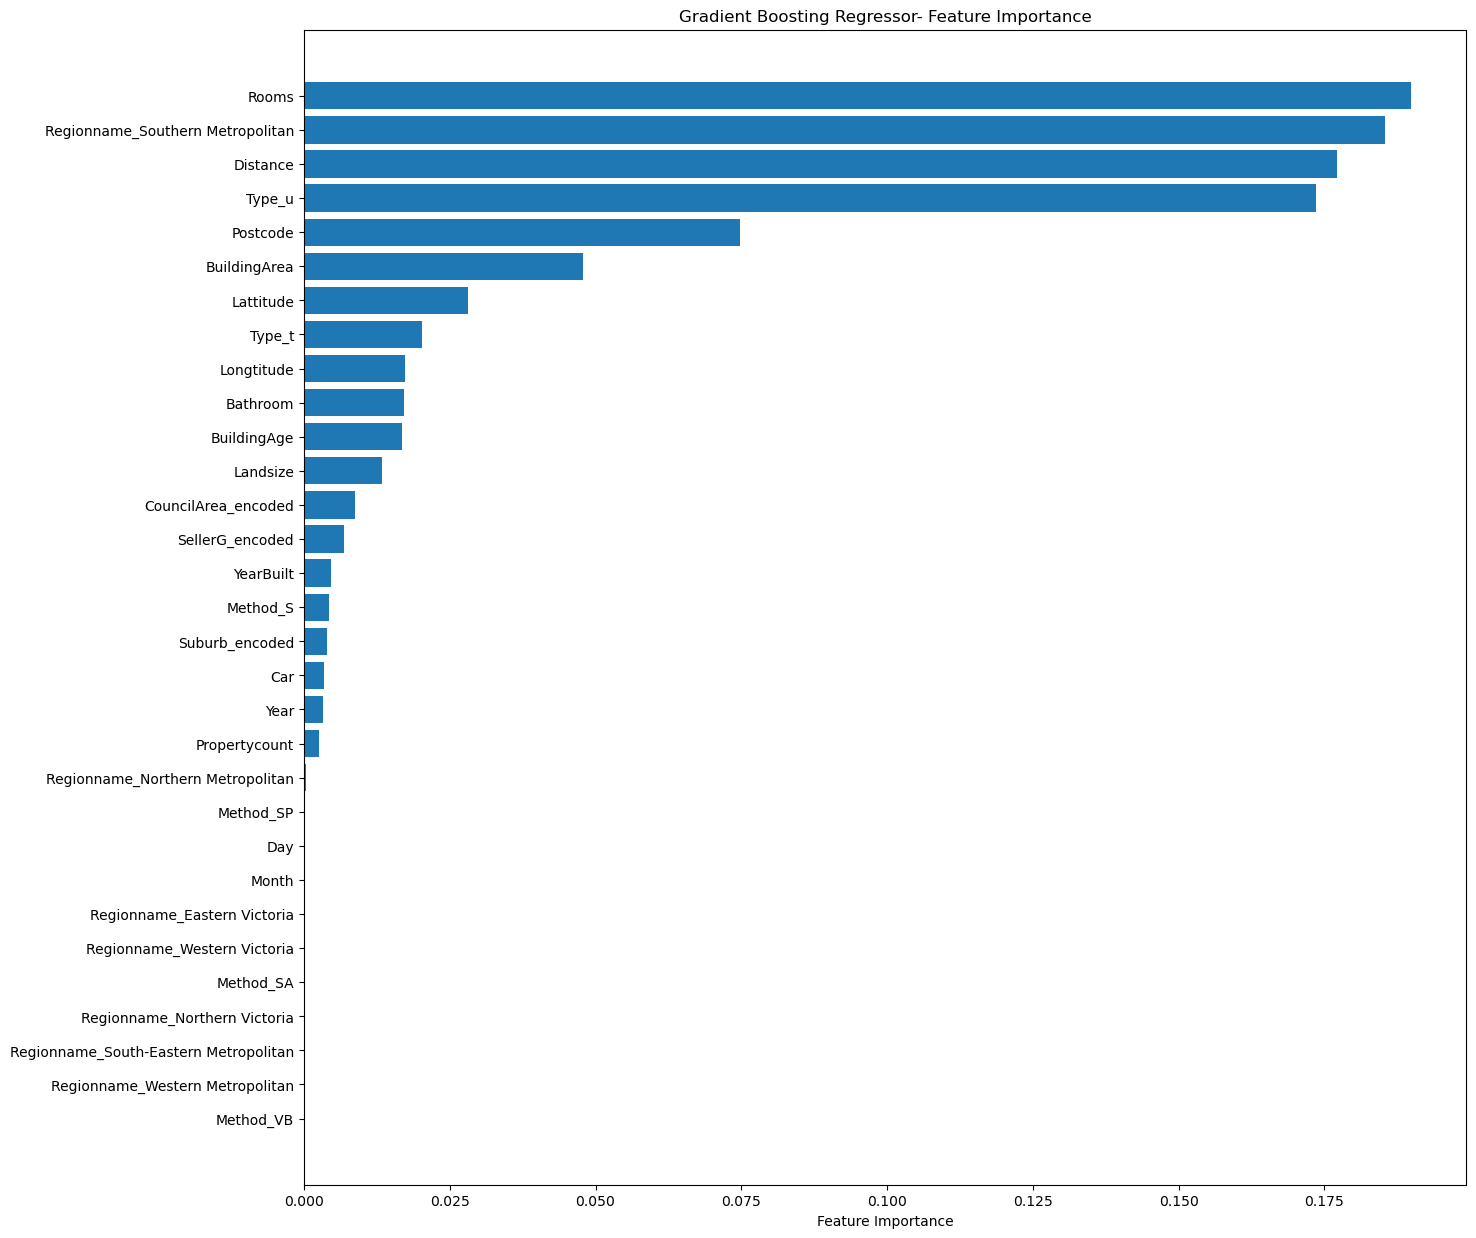

In [358]:
# Feature importance Graph from the trained Gradient Boosting Regressor model
feature_importance = GBR.feature_importances_
data_columns = input_data.columns

# Sort the indices based on feature importance
sorted_idx = feature_importance.argsort()
plt.figure(figsize=(15, 15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), data_columns[sorted_idx].tolist())  
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Regressor- Feature Importance")
plt.show()

<Figure size 1500x1500 with 0 Axes>

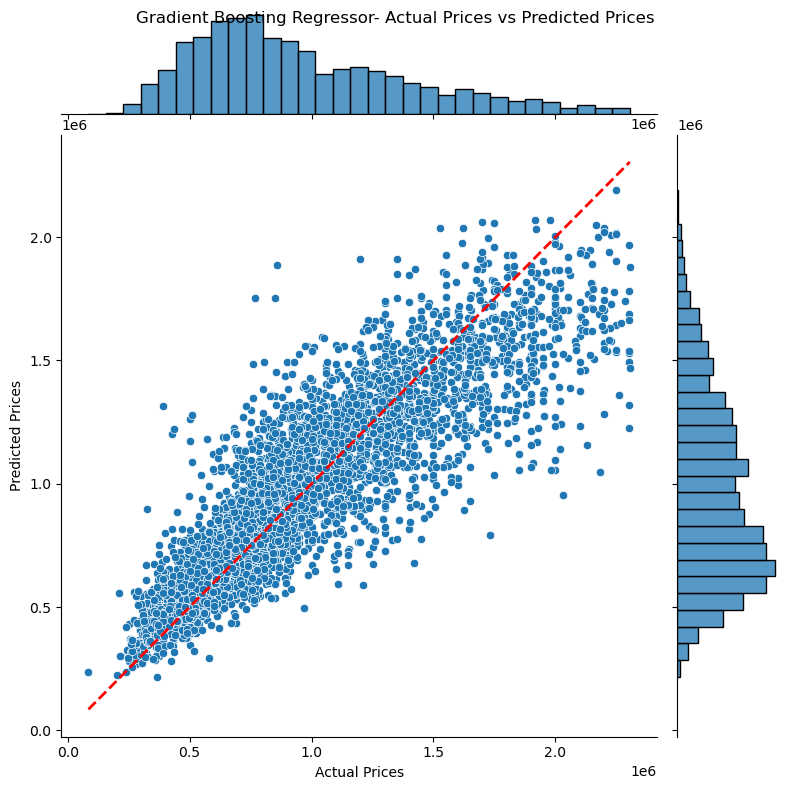

In [359]:
# DataFrame with Actual and Predicted prices
comparison_data = pd.DataFrame({'Actual Prices': Y_test.squeeze(), 'Predicted Prices': GBR_pred})
plt.figure(figsize=(15, 15))
sns.jointplot(x='Actual Prices', y='Predicted Prices', data=comparison_data, kind='scatter', height=8)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.suptitle('Gradient Boosting Regressor- Actual Prices vs Predicted Prices')
plt.show()

In [360]:
model_comparison = model_comparison.append({
    'Algorithm': GBR.__class__.__name__,
    'Prediction_score': pred_score_GBR,
    'Mean_Absolute_Error' : mae_GBR
}, ignore_index=True)
model_comparison

/var/folders/kp/xfqjcgz93rx88km955rkxtjm0000gn/T/ipykernel_37497/1683560408.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({


Algorithm  Prediction_score  Mean_Absolute_Error
0      DecisionTreeRegressor         60.869469        193390.613999
1           LinearRegression         63.608127        205623.054656
2  GradientBoostingRegressor         76.484865        154690.035853

# Algorithm 4. AdaBoostRegressor

In [361]:
adaboost_regressor = AdaBoostRegressor(random_state=42)
adaboost_regressor.fit(X_train, Y_train)

/Users/saisreereddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(random_state=42)

In [362]:
ABR_pred = adaboost_regressor.predict(X_test)

In [363]:
# AdaBoost Regressor with a Decision Tree as the base estimator 
abr_dt = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42), random_state=42)
abr_dt.fit(X_train, Y_train)

/Users/saisreereddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                  random_state=42)

In [364]:
ABR_DT_pred = abr_dt.predict(X_test)

### Evaluation of model using various metrics

### 1. ADABoost Regressor

In [365]:
r2_score_ABR= r2_score(Y_test,ABR_pred)
print("R-squared score using AdaBoost Regressor",r2_score_ABR)

R-squared score using AdaBoost Regressor 0.35829306567828045


In [366]:
mae_ABR= mean_absolute_error(Y_test,ABR_pred)
print("Mean Absolute Error using AdaBoost Regressor",mae_ABR)

Mean Absolute Error using AdaBoost Regressor 304152.2366688532


In [367]:
mse_ABR= mean_squared_error(Y_test, ABR_pred)
rmse_ABR= np.sqrt(mse_ABR)
print("Root Mean Square Error using AdaBoost Regressor",rmse_ABR)

Root Mean Square Error using AdaBoost Regressor 352989.7929569652


In [368]:
pred_score_ABR= adaboost_regressor.score(X_test, Y_test)*100
print("Accuracy using AdaBoost Regressor",pred_score_ABR)

Accuracy using AdaBoost Regressor 35.82930656782805


### 2. ADABoost Regressor with Decision tree

In [369]:
r2_score_ABR_DT= r2_score(Y_test,ABR_DT_pred)
print("R-squared score using ADABoost Regressor with Decision tree",r2_score_ABR_DT)

R-squared score using ADABoost Regressor with Decision tree 0.7834050161646516


In [370]:
mae_ABR_DT= mean_absolute_error(Y_test,ABR_DT_pred)
print("Mean Absolute Error using ADABoost Regressor with Decision tree",mae_ABR_DT)

Mean Absolute Error using ADABoost Regressor with Decision tree 142282.921218512


In [371]:
mse_ABR_DT= mean_squared_error(Y_test,ABR_DT_pred)
rmse_ABR_DT= np.sqrt(mse_ABR_DT)
print("Root Mean Square Error using ADABoost Regressor with Decision tree",rmse_ABR_DT)

Root Mean Square Error using ADABoost Regressor with Decision tree 205077.48303777105


In [372]:
pred_score_ABR_DT= abr_dt.score(X_test, Y_test)*100
print("Accuracy using ADABoost Regressor with Decision tree",pred_score_ABR_DT)

Accuracy using ADABoost Regressor with Decision tree 78.34050161646516


### Visualisation

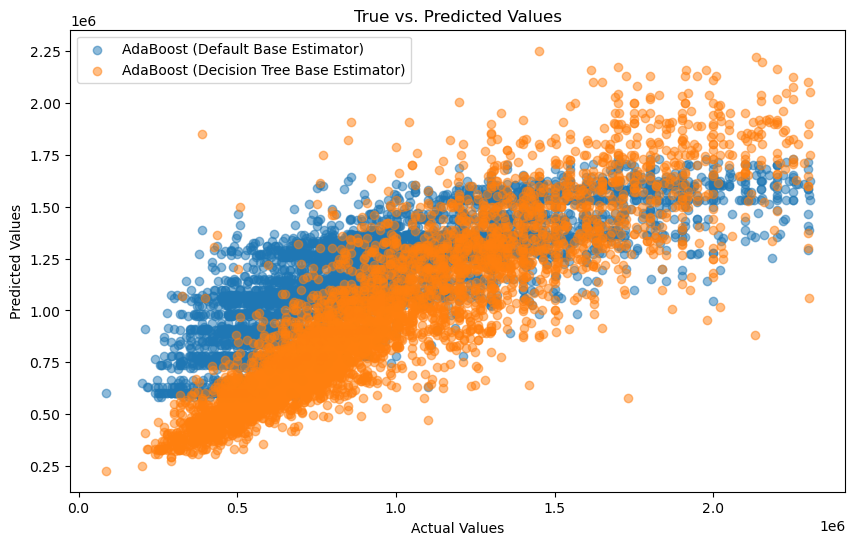

In [373]:
# Scatter plot between Actual and Predicted values of Adaboost Regressor
plt.figure(figsize=(10, 6))
# Scatter plot for AdaBoost with the default base estimator
plt.scatter(Y_test, ABR_pred, label="AdaBoost (Default Base Estimator)", alpha=0.5)
# Scatter plot for AdaBoost with a Decision Tree base estimator
plt.scatter(Y_test, ABR_DT_pred, label="AdaBoost (Decision Tree Base Estimator)", alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.legend()
plt.show()

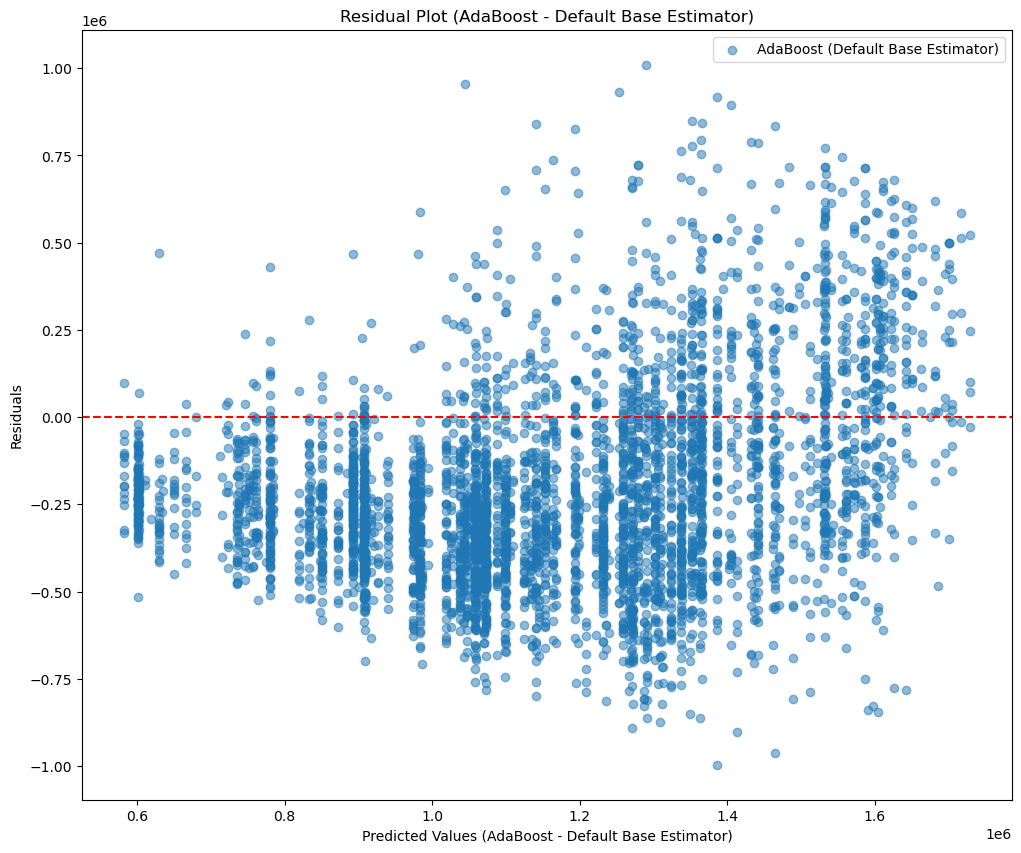

In [374]:
# Residual plot for Adaboost Regressor with Default base Estimator 
# Residuals for the first AdaBoost model
Y_test = Y_test.squeeze()
ABR_pred = ABR_pred.ravel()
residuals = Y_test - ABR_pred
plt.figure(figsize=(12, 10))
# Scatter plot for residuals of the first AdaBoost model
plt.scatter(ABR_pred, residuals, alpha=0.5, label="AdaBoost (Default Base Estimator)")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (AdaBoost - Default Base Estimator)")
plt.ylabel("Residuals")
plt.title("Residual Plot (AdaBoost - Default Base Estimator)")
plt.legend()
plt.show()

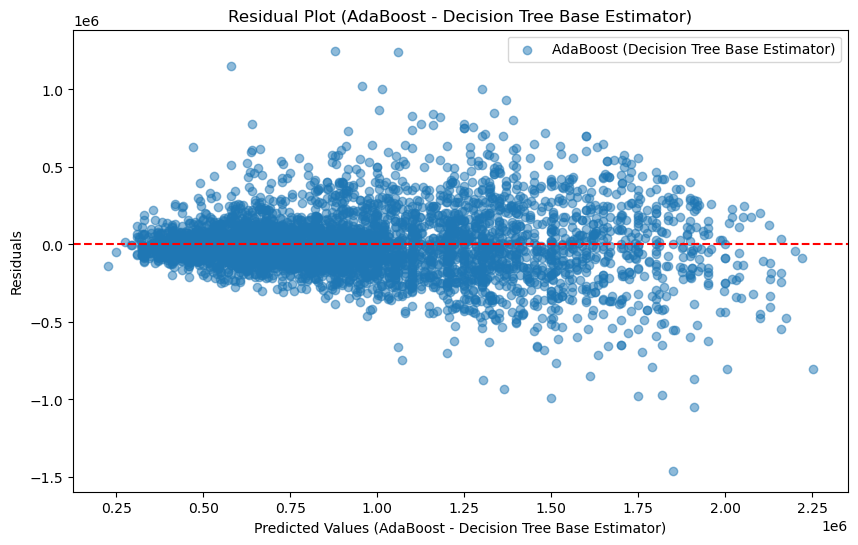

In [375]:
# Residual plot for Adaboost Regressor with Decision Tree Estimator
# Residuals for the second AdaBoost model
residuals_ = Y_test - ABR_DT_pred
plt.figure(figsize=(10, 6))
plt.scatter(ABR_DT_pred, residuals_, alpha=0.5, label="AdaBoost (Decision Tree Base Estimator)")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (AdaBoost - Decision Tree Base Estimator)")
plt.ylabel("Residuals")
plt.title("Residual Plot (AdaBoost - Decision Tree Base Estimator)")
plt.legend()
plt.show()

In [376]:
model_comparison = model_comparison.append({
    'Algorithm': adaboost_regressor.__class__.__name__,
    'Prediction_score': pred_score_ABR,
    'Mean_Absolute_Error' : mae_ABR
}, ignore_index=True)
model_comparison

/var/folders/kp/xfqjcgz93rx88km955rkxtjm0000gn/T/ipykernel_37497/3744874878.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({


Algorithm  Prediction_score  Mean_Absolute_Error
0      DecisionTreeRegressor         60.869469        193390.613999
1           LinearRegression         63.608127        205623.054656
2  GradientBoostingRegressor         76.484865        154690.035853
3          AdaBoostRegressor         35.829307        304152.236669

In [377]:
model_comparison = model_comparison.append({
    'Algorithm': 'AdaBoostRegressor With DT',
    'Prediction_score': pred_score_ABR_DT,
    'Mean_Absolute_Error' : mae_ABR_DT
}, ignore_index=True)
model_comparison

/var/folders/kp/xfqjcgz93rx88km955rkxtjm0000gn/T/ipykernel_37497/2807525180.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({


Algorithm  Prediction_score  Mean_Absolute_Error
0      DecisionTreeRegressor         60.869469        193390.613999
1           LinearRegression         63.608127        205623.054656
2  GradientBoostingRegressor         76.484865        154690.035853
3          AdaBoostRegressor         35.829307        304152.236669
4  AdaBoostRegressor With DT         78.340502        142282.921219

# Algorithm 5. Random Forest

In [378]:
random_forest = RandomForestRegressor(n_estimators = 100, random_state=1)
random_forest.fit(X_train, Y_train)

/var/folders/kp/xfqjcgz93rx88km955rkxtjm0000gn/T/ipykernel_37497/1452581609.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, Y_train)


RandomForestRegressor(random_state=1)

In [379]:
rf_pred = random_forest.predict(X_test)

### Evaluation of model using various metrics

In [380]:
r2_score_rf= r2_score(Y_test,rf_pred)
print("R-squared score using Random Forest Regressor",r2_score_rf)

R-squared score using Random Forest Regressor 0.7916070511619395


In [381]:
mae_rf= mean_absolute_error(Y_test,rf_pred)
print("Mean Absolute Error using Random Forest Regressor",mae_rf)

Mean Absolute Error using Random Forest Regressor 141453.23110883113


In [382]:
mse_rf= mean_squared_error(Y_test,rf_pred)
rmse_rf= np.sqrt(mse_rf)
print("Root Mean Square Error using Random Forest Regressor",rmse_rf)

Root Mean Square Error using Random Forest Regressor 201157.06548278473


In [383]:
pred_score_rf= random_forest.score(X_test, Y_test)*100
print("Accuracy using Random Forest Regressor",pred_score_rf)

Accuracy using Random Forest Regressor 79.16070511619395


### Visualisation

/Users/saisreereddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/saisreereddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/saisreereddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/saisreereddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

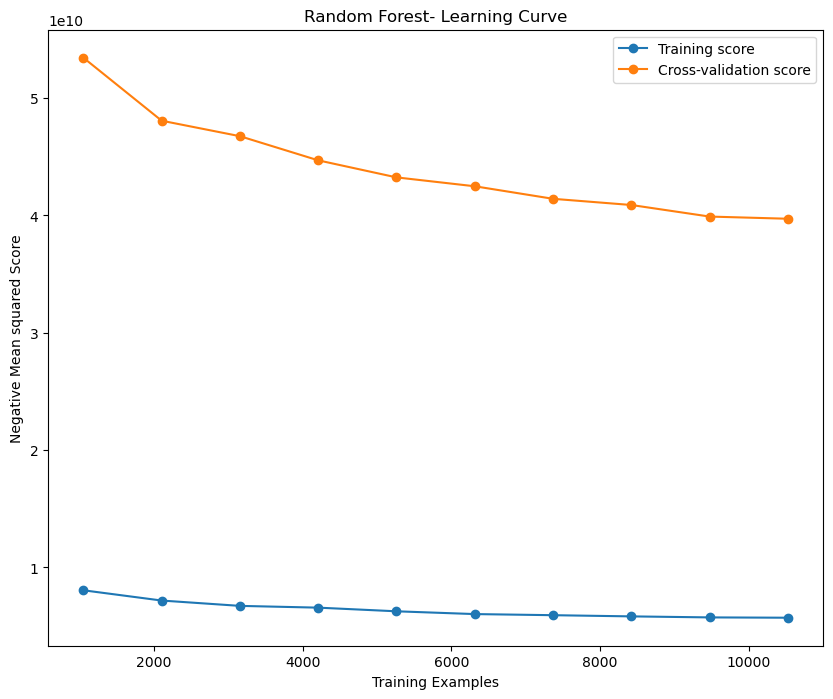

In [399]:
# Learning Curve for Random Forest
# Using negative mean squared error as the scoring metric
train_sizes, train_scores, test_scores = learning_curve(
    random_forest, X_train, Y_train, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_scores_mean, marker='o', label='Training score')
plt.plot(train_sizes, test_scores_mean, marker='o', label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Negative Mean squared Score")
plt.title("Random Forest- Learning Curve")
plt.legend()
plt.show()

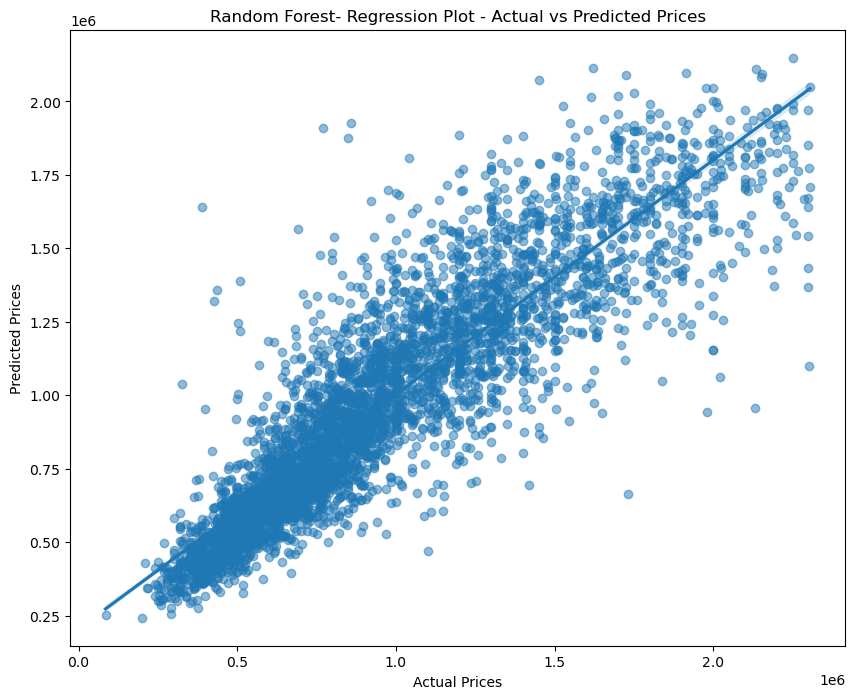

In [385]:
# Regression plot using seaborn's regplot
plt.figure(figsize=(10, 8))
sns.regplot(x=Y_test.squeeze(), y=rf_pred, scatter_kws={'alpha': 0.5})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest- Regression Plot - Actual vs Predicted Prices")
plt.show()

In [386]:
model_comparison = model_comparison.append({
    'Algorithm': random_forest.__class__.__name__,
    'Prediction_score': pred_score_rf,
    'Mean_Absolute_Error' : mae_rf
}, ignore_index=True)
model_comparison

/var/folders/kp/xfqjcgz93rx88km955rkxtjm0000gn/T/ipykernel_37497/3686937495.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({


Algorithm  Prediction_score  Mean_Absolute_Error
0      DecisionTreeRegressor         60.869469        193390.613999
1           LinearRegression         63.608127        205623.054656
2  GradientBoostingRegressor         76.484865        154690.035853
3          AdaBoostRegressor         35.829307        304152.236669
4  AdaBoostRegressor With DT         78.340502        142282.921219
5      RandomForestRegressor         79.160705        141453.231109

# Algorithm 6. XGBoost Regressor

In [387]:
XGBR = XGBRegressor(random_state=42)
XGBR.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [388]:
XGBR_pred = XGBR.predict(X_test)

### Evaluation of model using various metrics

In [389]:
r2_score_XGBR= r2_score(Y_test,XGBR_pred)
print("R-squared score using XGBoost Regressor",r2_score_XGBR)

R-squared score using XGBoost Regressor 0.811171682589503


In [390]:
mae_XGBR= mean_absolute_error(Y_test,XGBR_pred)
print("Mean Absolute Error using XGBoost Regressor",mae_XGBR)

Mean Absolute Error using XGBoost Regressor 135981.66746466028


In [391]:
mse_XGBR= mean_squared_error(Y_test,XGBR_pred)
rmse_XGBR= np.sqrt(mse_XGBR)
print("Root Mean Square Error using XGBoost Regressor",rmse_XGBR)

Root Mean Square Error using XGBoost Regressor 191481.7301815415


In [392]:
pred_score_XGBR= XGBR.score(X_test, Y_test)*100
print("Accuracy using XGBoost Regressor",pred_score_XGBR)

Accuracy using XGBoost Regressor 81.1171682589503


### Visualisation

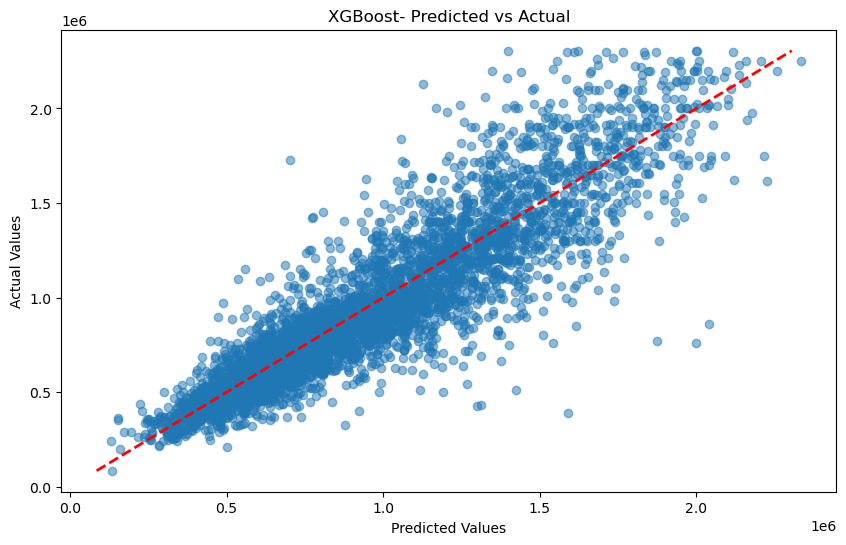

In [393]:
#Scatter Plot between Predicted and Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(XGBR_pred, Y_test, alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("XGBoost- Predicted vs Actual")
plt.show()

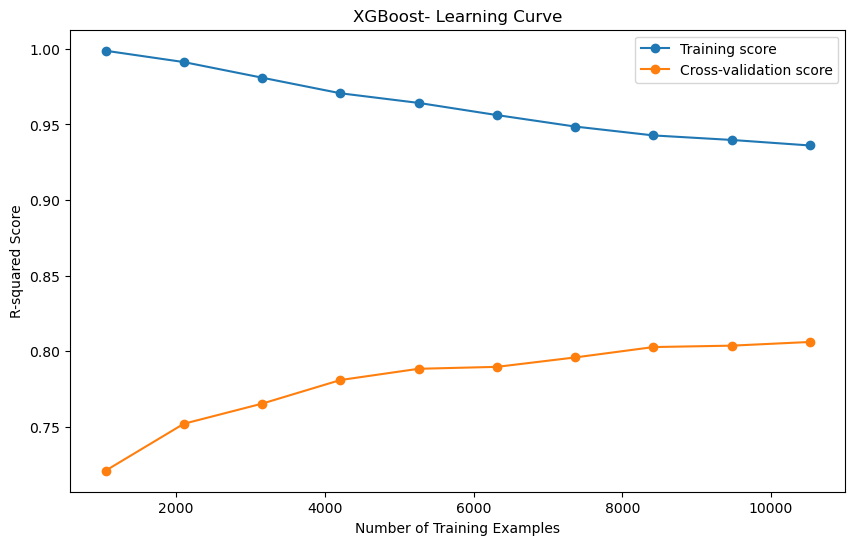

In [394]:
# Learning Curve for XGBoost Regressor
train_sizes, train_scores, test_scores = learning_curve(
    XGBR, X_train, Y_train, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, marker='o', label='Training score')
plt.plot(train_sizes, test_scores_mean, marker='o', label='Cross-validation score')
plt.xlabel("Number of Training Examples")
plt.ylabel("R-squared Score")
plt.title("XGBoost- Learning Curve")
plt.legend()
plt.show()

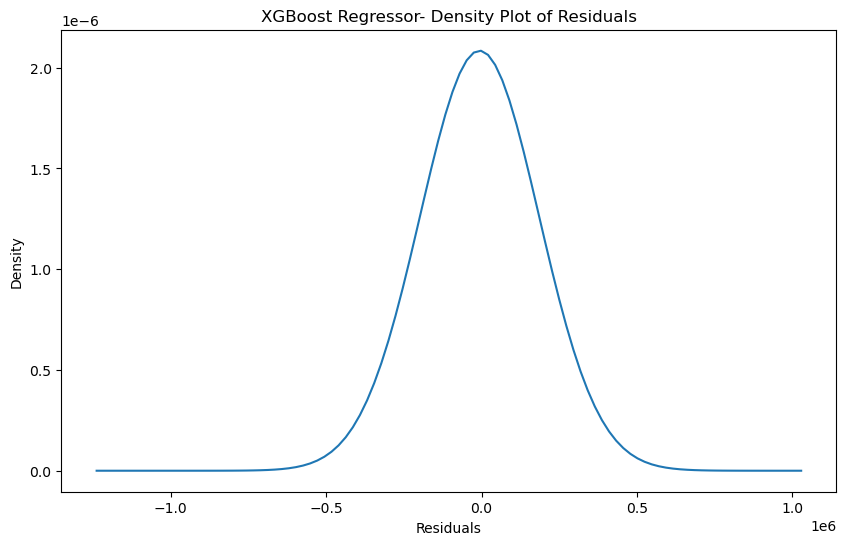

In [395]:
# Density Plot of Residuals
residuals = Y_test - XGBR_pred

# mean and standard deviation of the residuals
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

# array of values within the range of residuals
x_range = np.linspace(residuals.min(), residuals.max(), 100)

# Probability Density Function of the residuals using a normal distribution
density_values = norm.pdf(x_range, residual_mean, residual_std)

plt.figure(figsize=(10, 6))
plt.plot(x_range, density_values)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('XGBoost Regressor- Density Plot of Residuals')
plt.show()

In [396]:
model_comparison = model_comparison.append({
    'Algorithm': XGBR.__class__.__name__,
    'Prediction_score': pred_score_XGBR,
    'Mean_Absolute_Error' : mae_XGBR,
}, ignore_index=True)
model_comparison

/var/folders/kp/xfqjcgz93rx88km955rkxtjm0000gn/T/ipykernel_37497/521685475.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({


Algorithm  Prediction_score  Mean_Absolute_Error
0      DecisionTreeRegressor         60.869469        193390.613999
1           LinearRegression         63.608127        205623.054656
2  GradientBoostingRegressor         76.484865        154690.035853
3          AdaBoostRegressor         35.829307        304152.236669
4  AdaBoostRegressor With DT         78.340502        142282.921219
5      RandomForestRegressor         79.160705        141453.231109
6               XGBRegressor         81.117168        135981.667465

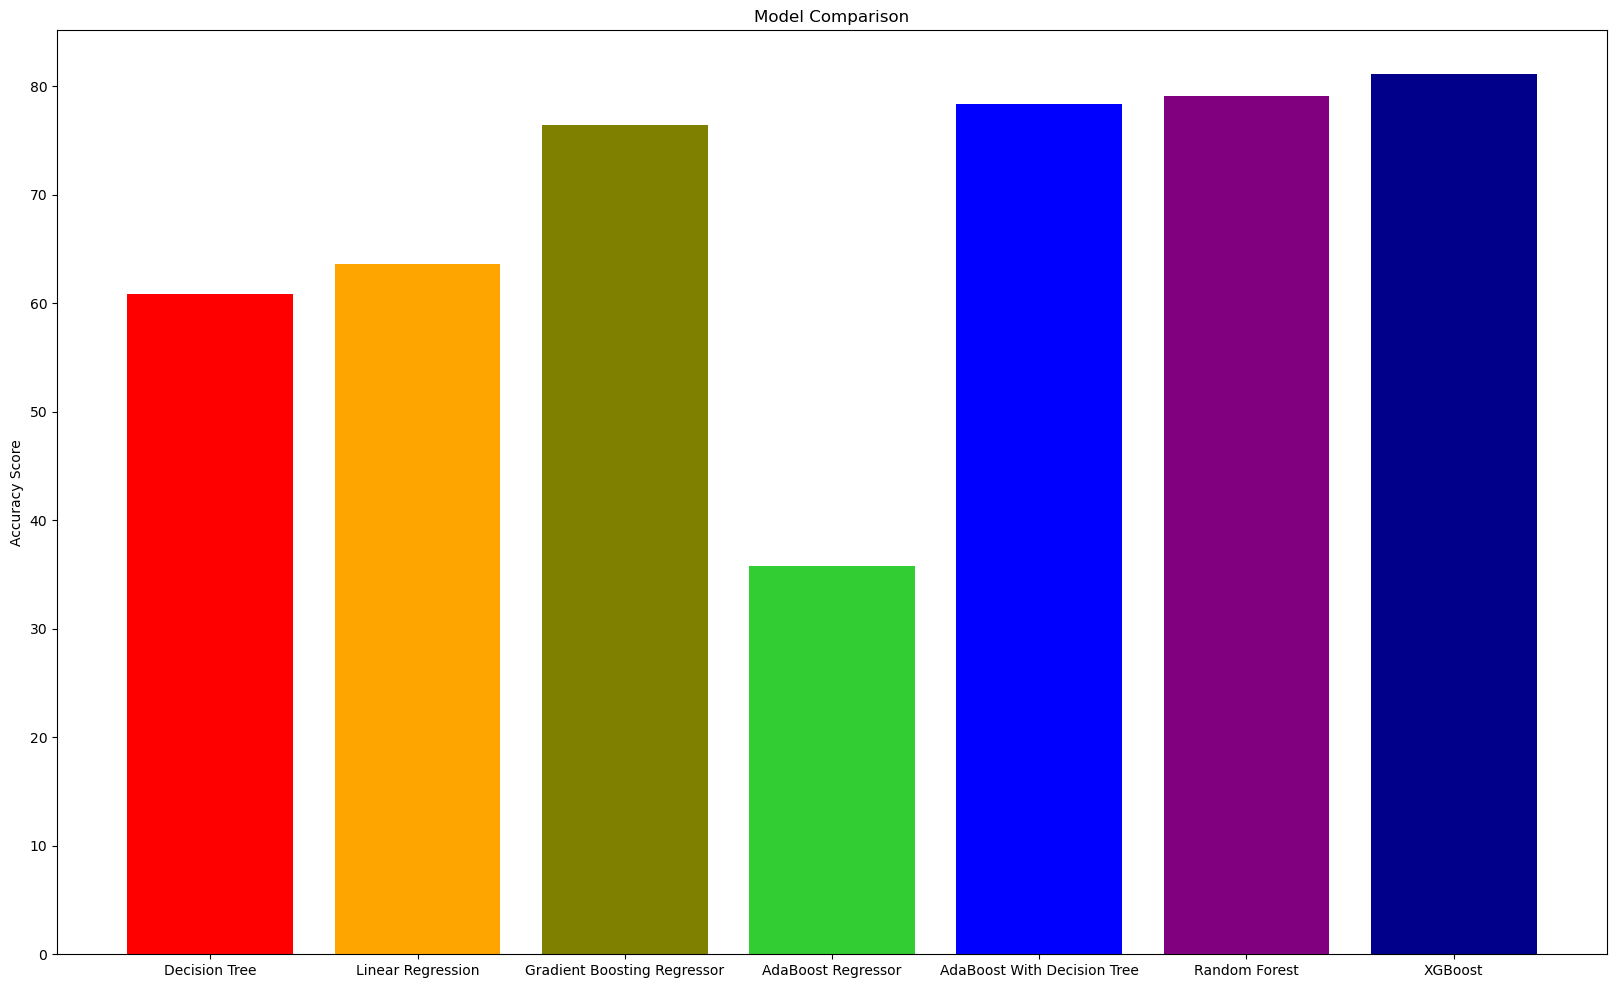

In [397]:
# different Models Comparison
models = ['Decision Tree', 'Linear Regression', 'Gradient Boosting Regressor', 'AdaBoost Regressor', 'AdaBoost With Decision Tree', 'Random Forest', 'XGBoost']
accuracy_scores = [pred_score_dt, pred_score_lr, pred_score_GBR, pred_score_ABR, pred_score_ABR_DT, pred_score_rf , pred_score_XGBR]
plt.figure(figsize=(20, 12))
colors = ['red', 'orange', 'olive', 'limegreen', 'blue', 'purple', 'darkblue']
plt.bar(models, accuracy_scores, color=colors)
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.show()

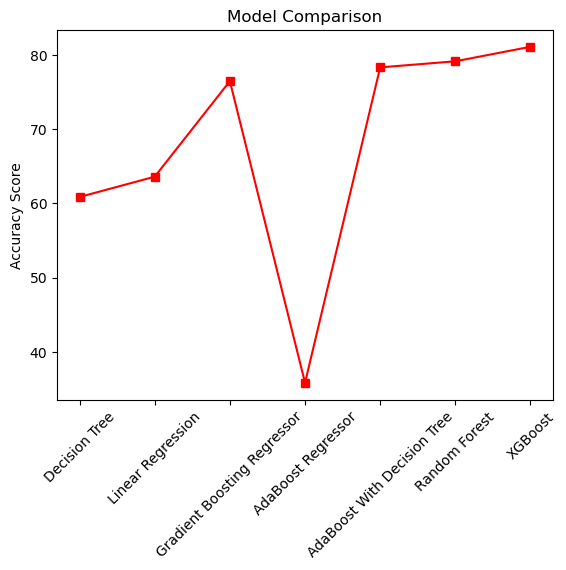

In [398]:
plt.plot(models, accuracy_scores, marker='s', linestyle='-', color='red')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()
